
# Actividad 3

Equipo 3

- Arturo Hernández Pereztagle			A00838056
- José Eduardo López Arzamendi			A00836314
- Jose Miguel Ruiz de la Garza			A01722268
- Juan Marco Castro Trinidad			A01742821

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Cargar Datos y Definir Variables

In [2]:
# Convierte el excel a csv
import pandas as pd

def excel_a_csv(ruta_excel, ruta_csv):
    # Lee el archivo Excel
    df = pd.read_excel(ruta_excel)
    
    # Guarda el DataFrame como un archivo CSV
    df.to_csv(ruta_csv, index=False)

if __name__ == "__main__":
    ruta_excel = "act2_empresas.xlsx"
    ruta_csv = "datos_historicos_act2.csv"
    excel_a_csv(ruta_excel, ruta_csv)
    print(f"Archivo convertido de {ruta_excel} a {ruta_csv}")

Archivo convertido de act2_empresas.xlsx a datos_historicos_act2.csv


In [3]:
# Cargar datos históricos
df = pd.read_csv('datos_historicos_act2.csv')

# Mostrar primeras filas
print("Datos cargados:")
print(df.head())
print(f"\nDimensiones: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")

Datos cargados:
         Date  Día    SIEGn.DE  AAPL.O     LMT  MSFT.O  NVDA.O  GOOGL.O  \
0  2025-11-04    1  280.390440  270.04  484.98  514.33  198.69   277.54   
1  2025-11-03    2  284.724960  269.05  487.94  517.03  206.88   283.72   
2  2025-10-31    3  283.217370  270.37  491.88  517.81  202.49   281.19   
3  2025-10-30    4  285.655500  271.40  489.72  525.76  202.89   281.48   
4  2025-10-29    5  285.045425  269.70  485.33  541.55  207.04   274.57   

   INTC.O       XAU=  
0   37.03  3931.7800  
1   39.50  4001.4200  
2   39.99  4001.7798  
3   40.16  4023.2200  
4   41.34  3929.3633  

Dimensiones: (1000, 10)

Columnas: ['Date', 'Día', 'SIEGn.DE', 'AAPL.O', 'LMT', 'MSFT.O', 'NVDA.O', 'GOOGL.O', 'INTC.O', 'XAU=']


In [4]:
# Definir el número de acciones de cada empresa
acciones = {
    'SIEGn.DE': 369,
    'AAPL.O': 528,
    'LMT': 217,
    'MSFT.O': 200,
    'NVDA.O': 1892,    
    'GOOGL.O': 381,
    'INTC.O': 1436,
    'XAU=': 9
}

print("Número de acciones por empresa:")
for empresa, num_acciones in acciones.items():
    print(f"{empresa}: {num_acciones}")

Número de acciones por empresa:
SIEGn.DE: 369
AAPL.O: 528
LMT: 217
MSFT.O: 200
NVDA.O: 1892
GOOGL.O: 381
INTC.O: 1436
XAU=: 9


## 2. Calcular V0 (Valor del Portafolio)

In [5]:
# Calcular V0 (valor del portafolio) para cada día
# V0 = suma de (precio * número de acciones) para todas las empresas

df['V0'] = 0
for empresa, num_acciones in acciones.items():
    if empresa in df.columns:
        df['V0'] += df[empresa] * num_acciones
    else:
        print(f"Advertencia: {empresa} no encontrada en el DataFrame")

print("V0 calculado para cada día:")
print(df[['Date', 'Día', 'V0']].head(10))
print(f"\nV0 actual (día más reciente): ${df['V0'].iloc[0]:,.2f}")

V0 calculado para cada día:
         Date  Día            V0
0  2025-11-04    1  1.024377e+06
1  2025-11-03    2  1.048660e+06
2  2025-10-31    3  1.041249e+06
3  2025-10-30    4  1.045118e+06
4  2025-10-29    5  1.052269e+06
5  2025-10-28    6  1.039173e+06
6  2025-10-27    7  1.017422e+06
7  2025-10-24    8  9.967274e+05
8  2025-10-23    9  9.828002e+05
9  2025-10-22   10  9.767987e+05

V0 actual (día más reciente): $1,024,377.17


## 3. Calcular P&L (Profit and Loss)

In [6]:
# Calcular P&L: diferencia entre el V0 del día actual y el V0 del día anterior
# P&L = V0_actual - V0_anterior
# Como los datos están ordenados del más reciente al más antiguo, usamos shift(-1)

df['P&L'] = df['V0'] - df['V0'].shift(-1)

# El último día no tiene P&L porque no hay día siguiente
print("P&L calculado:")
print(df[['Date', 'Día', 'V0', 'P&L']].head(10))
print(f"\nNúmero de P&L calculados: {df['P&L'].notna().sum()}")

P&L calculado:
         Date  Día            V0           P&L
0  2025-11-04    1  1.024377e+06 -24282.777880
1  2025-11-03    2  1.048660e+06   7411.292510
2  2025-10-31    3  1.041249e+06  -3869.161770
3  2025-10-30    4  1.045118e+06  -7151.512025
4  2025-10-29    5  1.052269e+06  13096.066175
5  2025-10-28    6  1.039173e+06  21750.922890
6  2025-10-27    7  1.017422e+06  20694.964560
7  2025-10-24    8  9.967274e+05  13927.187855
8  2025-10-23    9  9.828002e+05   6001.532045
9  2025-10-22   10  9.767987e+05  -5257.398280

Número de P&L calculados: 999


## 4. Calcular Ranked P&L

In [7]:
# Ranked P&L: ordenar el P&L de menor a mayor
df['Ranked_P&L'] = df['P&L'].rank(method='min', na_option='keep')

print("Ranked P&L:")
print(df[['Date', 'Día', 'P&L', 'Ranked_P&L']].dropna().head(10))
print("\nP&L más bajo (peores pérdidas):")
print(df[['Date', 'Día', 'P&L', 'Ranked_P&L']].nsmallest(5, 'P&L'))

Ranked P&L:
         Date  Día           P&L  Ranked_P&L
0  2025-11-04    1 -24282.777880        10.0
1  2025-11-03    2   7411.292510       824.0
2  2025-10-31    3  -3869.161770       247.0
3  2025-10-30    4  -7151.512025       143.0
4  2025-10-29    5  13096.066175       941.0
5  2025-10-28    6  21750.922890       994.0
6  2025-10-27    7  20694.964560       992.0
7  2025-10-24    8  13927.187855       953.0
8  2025-10-23    9   6001.532045       771.0
9  2025-10-22   10  -5257.398280       187.0

P&L más bajo (peores pérdidas):
           Date  Día           P&L  Ranked_P&L
198  2025-01-22  199 -49479.954805         1.0
149  2025-04-02  150 -41376.912310         2.0
150  2025-04-01  151 -36075.052725         3.0
297  2024-08-28  298 -32841.116040         4.0
17   2025-10-10   18 -30151.859255         5.0


## 5. Calcular Rendimiento

In [8]:
# Calcular Rendimiento: (V0_actual / V0_anterior) - 1
df['Rendimiento'] = (df['V0'] / df['V0'].shift(-1)) - 1

print("Rendimiento calculado:")
print(df[['Date', 'Día', 'V0', 'Rendimiento']].head(10))

# Estadísticas del rendimiento
print("\n" + "="*50)
print("ESTADÍSTICAS DEL RENDIMIENTO")
print("="*50)
print(f"Rendimiento promedio: {df['Rendimiento'].mean():.6f}")
print(f"Desviación estándar: {df['Rendimiento'].std():.6f}")
print(f"Rendimiento mínimo: {df['Rendimiento'].min():.6f}")
print(f"Rendimiento máximo: {df['Rendimiento'].max():.6f}")

Rendimiento calculado:
         Date  Día            V0  Rendimiento
0  2025-11-04    1  1.024377e+06    -0.023156
1  2025-11-03    2  1.048660e+06     0.007118
2  2025-10-31    3  1.041249e+06    -0.003702
3  2025-10-30    4  1.045118e+06    -0.006796
4  2025-10-29    5  1.052269e+06     0.012602
5  2025-10-28    6  1.039173e+06     0.021378
6  2025-10-27    7  1.017422e+06     0.020763
7  2025-10-24    8  9.967274e+05     0.014171
8  2025-10-23    9  9.828002e+05     0.006144
9  2025-10-22   10  9.767987e+05    -0.005353

ESTADÍSTICAS DEL RENDIMIENTO
Rendimiento promedio: 0.000839
Desviación estándar: 0.014097
Rendimiento mínimo: -0.062164
Rendimiento máximo: 0.109550


In [9]:
# Guardar variables importantes para usar en cálculos posteriores
rendimiento_promedio = df['Rendimiento'].mean()
desviacion_estandar = df['Rendimiento'].std()
V0_hoy = df['V0'].iloc[0]  # Valor más reciente del portafolio

print(f"\nVariables guardadas:")
print(f"Rendimiento Promedio: {rendimiento_promedio:.6f}")
print(f"Desviación Estándar: {desviacion_estandar:.6f}")
print(f"V0 Actual: ${V0_hoy:,.2f}")


Variables guardadas:
Rendimiento Promedio: 0.000839
Desviación Estándar: 0.014097
V0 Actual: $1,024,377.17


## 6. Calcular VaR Paramétrico

In [10]:
# VaR Paramétrico
# Basado en la distribución normal de los rendimientos

# Valores z para diferentes niveles de confianza
z_99 = 2.326  # 99% de confianza (1% VaR)
z_95 = 1.645  # 95% de confianza (5% VaR)

# Fórmula: VaR = V0 * (z * desviación_estándar - rendimiento_promedio)
# Nota: Corregí la fórmula para que sea correcta según la teoría de VaR
VaR_parametrico_1pct = V0_hoy * (rendimiento_promedio - z_99 * desviacion_estandar)
VaR_parametrico_5pct = V0_hoy * (rendimiento_promedio - z_95 * desviacion_estandar)

print("="*60)
print("VaR PARAMÉTRICO (1 día)")
print("="*60)
print(f"\n1% VaR (99% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_parametrico_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_parametrico_5pct/V0_hoy)*100:.2f}%")

print(f"\nValor del portafolio actual: ${V0_hoy:,.2f}")

VaR PARAMÉTRICO (1 día)

1% VaR (99% confianza):
  Pérdida máxima esperada: $32,728.79
  Porcentaje del portafolio: -3.19%

5% VaR (95% confianza):
  Pérdida máxima esperada: $22,894.80
  Porcentaje del portafolio: -2.23%

Valor del portafolio actual: $1,024,377.17


## 7. Calcular VaR No Paramétrico (Histórico)

In [11]:
# ============================================================================
# VaR NO PARAMÉTRICO (HISTÓRICO)
# ============================================================================
# Método tradicional: usa los percentiles de las pérdidas históricas del portafolio
# Este método refleja el riesgo real del portafolio completo

# Limpiar datos NaN
PnL_clean = df['P&L'].dropna()

# Ordenar P&L de menor a mayor (pérdidas más grandes primero)
PnL_sorted = PnL_clean.sort_values()

# Calcular percentiles
num_observaciones = len(PnL_sorted)
indice_1pct = int(num_observaciones * 0.01)
indice_5pct = int(num_observaciones * 0.05)

# VaR no paramétrico: el percentil correspondiente del P&L
VaR_no_parametrico_1pct = PnL_sorted.iloc[indice_1pct]
VaR_no_parametrico_5pct = PnL_sorted.iloc[indice_5pct]

print("="*70)
print("VaR NO PARAMÉTRICO (HISTÓRICO)")
print("="*70)
print(f"\n📊 Método: Percentiles de P&L histórico")
print(f"   Número de observaciones: {num_observaciones}")
print(f"   Se ordenan todas las pérdidas/ganancias de menor a mayor")

print(f"\n1% VaR (99% confianza):")
print(f"  Posición en ranking: {indice_1pct + 1} de {num_observaciones}")
print(f"  P&L en ese percentil: ${VaR_no_parametrico_1pct:,.2f}")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_no_parametrico_1pct/V0_hoy)*100:.2f}%")

print(f"\n5% VaR (95% confianza):")
print(f"  Posición en ranking: {indice_5pct + 1} de {num_observaciones}")
print(f"  P&L en ese percentil: ${VaR_no_parametrico_5pct:,.2f}")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_no_parametrico_5pct/V0_hoy)*100:.2f}%")

print("\n✅ Este método considera todas las pérdidas históricas del portafolio completo.")

VaR NO PARAMÉTRICO (HISTÓRICO)

📊 Método: Percentiles de P&L histórico
   Número de observaciones: 999
   Se ordenan todas las pérdidas/ganancias de menor a mayor

1% VaR (99% confianza):
  Posición en ranking: 10 de 999
  P&L en ese percentil: $-24,282.78
  Pérdida máxima esperada: $24,282.78
  Porcentaje del portafolio: -2.37%

5% VaR (95% confianza):
  Posición en ranking: 50 de 999
  P&L en ese percentil: $-12,433.00
  Pérdida máxima esperada: $12,433.00
  Porcentaje del portafolio: -1.21%

✅ Este método considera todas las pérdidas históricas del portafolio completo.


## 8. Comparación VaR Paramétrico vs No Paramétrico

In [12]:
# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Método': ['Paramétrico (Normal)', 'No Paramétrico (Histórico)'],
    '1% VaR': [abs(VaR_parametrico_1pct), abs(VaR_no_parametrico_1pct)],
    '5% VaR': [abs(VaR_parametrico_5pct), abs(VaR_no_parametrico_5pct)]
})

print("="*70)
print("COMPARACIÓN DE MÉTODOS VaR")
print("="*70)
print("\n" + comparacion.to_string(index=False))

# Diferencias entre métodos
print(f"\n{'='*70}")
print("ANÁLISIS DE DIFERENCIAS:")
print(f"{'='*70}")

diferencia_1pct = abs(VaR_no_parametrico_1pct) - abs(VaR_parametrico_1pct)
diferencia_5pct = abs(VaR_no_parametrico_5pct) - abs(VaR_parametrico_5pct)

print(f"\n1% VaR (99% Confianza):")
print(f"  Paramétrico:       ${abs(VaR_parametrico_1pct):,.2f}")
print(f"  No Paramétrico:    ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"  Diferencia:        ${abs(diferencia_1pct):,.2f} ({(diferencia_1pct/abs(VaR_parametrico_1pct))*100:+.2f}%)")

print(f"\n5% VaR (95% Confianza):")
print(f"  Paramétrico:       ${abs(VaR_parametrico_5pct):,.2f}")
print(f"  No Paramétrico:    ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"  Diferencia:        ${abs(diferencia_5pct):,.2f} ({(diferencia_5pct/abs(VaR_parametrico_5pct))*100:+.2f}%)")

print(f"\n\n💡 INTERPRETACIÓN:")
print("-" * 70)
print(f"   • Método Paramétrico: Asume distribución normal de los rendimientos")
print(f"   • Método No Paramétrico: Usa la distribución real histórica del P&L")
print(f"   • El método histórico NO asume normalidad y captura mejor eventos extremos")
if diferencia_1pct > 1000:
    print(f"   • ⚠️  El VaR histórico es MAYOR, indicando colas más pesadas que la normal")
    print(f"   • Los eventos extremos son más probables de lo que predice el modelo normal")
print(f"\n   ✅ RECOMENDACIÓN: Usar el VaR histórico como medida principal de riesgo")

COMPARACIÓN DE MÉTODOS VaR

                    Método       1% VaR       5% VaR
      Paramétrico (Normal) 32728.790395 22894.801744
No Paramétrico (Histórico) 24282.777880 12432.995970

ANÁLISIS DE DIFERENCIAS:

1% VaR (99% Confianza):
  Paramétrico:       $32,728.79
  No Paramétrico:    $24,282.78
  Diferencia:        $8,446.01 (-25.81%)

5% VaR (95% Confianza):
  Paramétrico:       $22,894.80
  No Paramétrico:    $12,433.00
  Diferencia:        $10,461.81 (-45.70%)


💡 INTERPRETACIÓN:
----------------------------------------------------------------------
   • Método Paramétrico: Asume distribución normal de los rendimientos
   • Método No Paramétrico: Usa la distribución real histórica del P&L
   • El método histórico NO asume normalidad y captura mejor eventos extremos

   ✅ RECOMENDACIÓN: Usar el VaR histórico como medida principal de riesgo


## 9. Visualizaciones

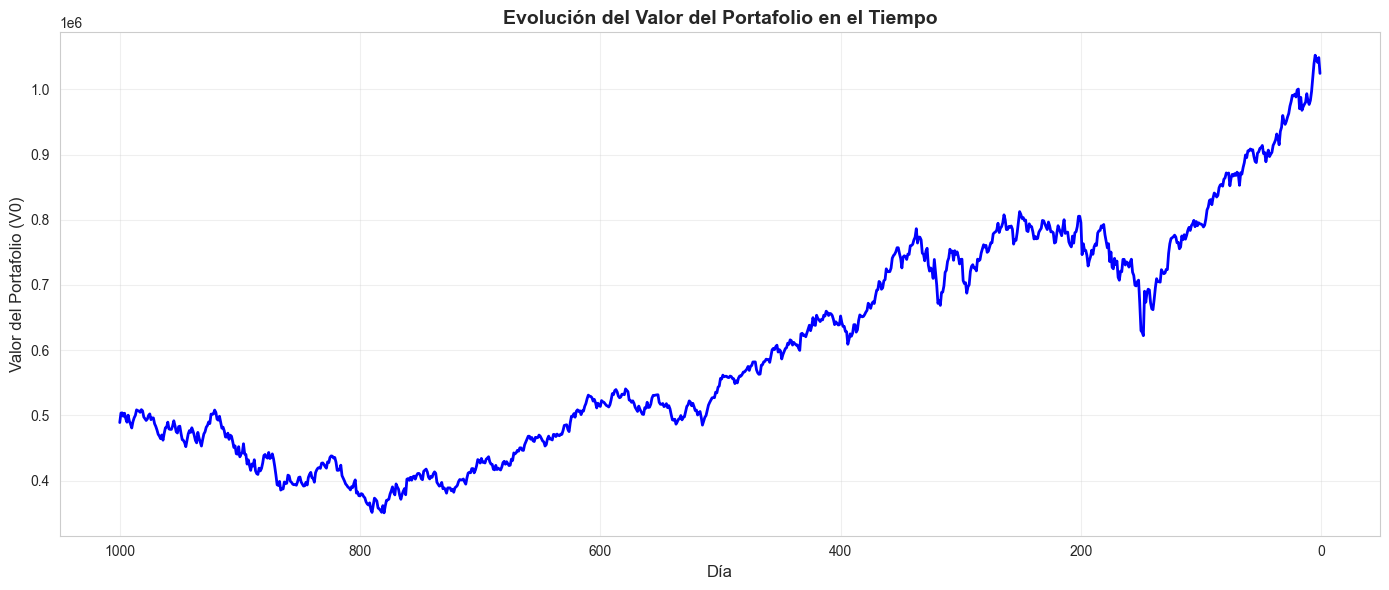

Valor inicial (día 1000): $489,090.17
Valor final (día 1): $1,024,377.17
Cambio total: $535,287.00


In [13]:
# Gráfico 1: Evolución del valor del portafolio (V0)
plt.figure(figsize=(14, 6))
plt.plot(df['Día'], df['V0'], linewidth=2, color='blue')
plt.xlabel('Día', fontsize=12)
plt.ylabel('Valor del Portafolio (V0)', fontsize=12)
plt.title('Evolución del Valor del Portafolio en el Tiempo', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.gca().invert_xaxis()  # Invertir para mostrar del más antiguo al más reciente
plt.tight_layout()
plt.show()

print(f"Valor inicial (día 1000): ${df['V0'].iloc[-1]:,.2f}")
print(f"Valor final (día 1): ${df['V0'].iloc[0]:,.2f}")
print(f"Cambio total: ${df['V0'].iloc[0] - df['V0'].iloc[-1]:,.2f}")

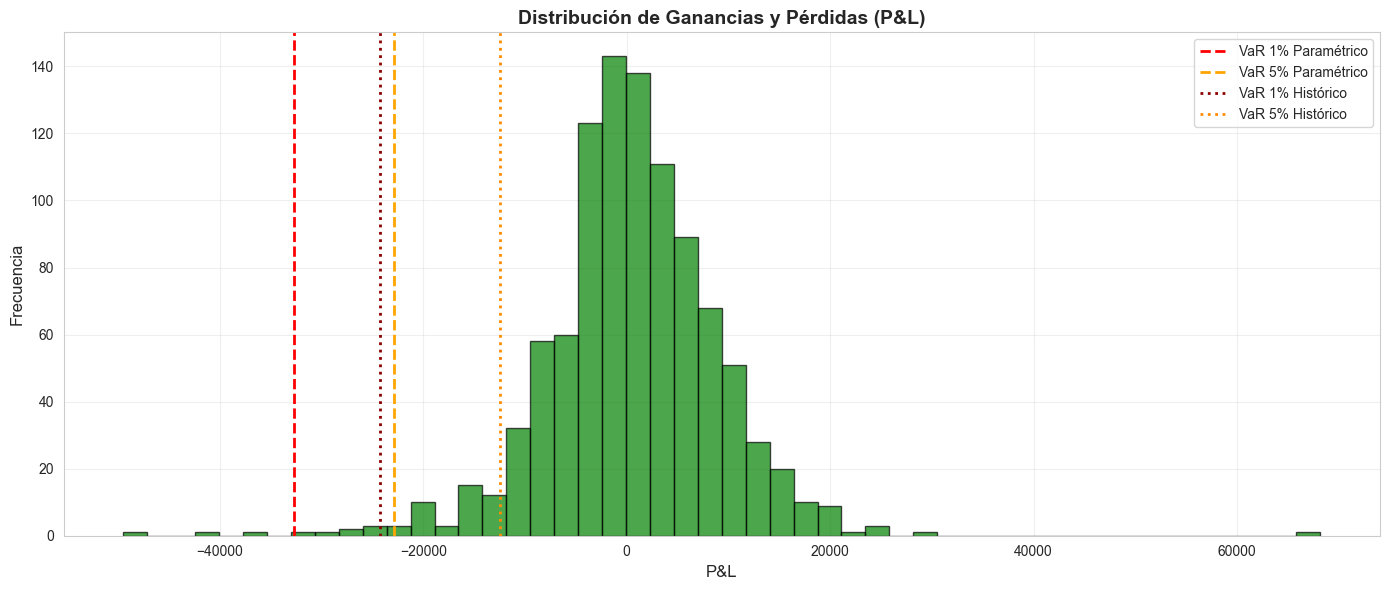

In [14]:
# Gráfico 2: Distribución de P&L
plt.figure(figsize=(14, 6))
plt.hist(df['P&L'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
plt.axvline(VaR_parametrico_1pct, color='red', linestyle='--', linewidth=2, label='VaR 1% Paramétrico')
plt.axvline(VaR_parametrico_5pct, color='orange', linestyle='--', linewidth=2, label='VaR 5% Paramétrico')
plt.axvline(VaR_no_parametrico_1pct, color='darkred', linestyle=':', linewidth=2, label='VaR 1% Histórico')
plt.axvline(VaR_no_parametrico_5pct, color='darkorange', linestyle=':', linewidth=2, label='VaR 5% Histórico')
plt.xlabel('P&L', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Ganancias y Pérdidas (P&L)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
df

,Date,Día,SIEGn.DE,AAPL.O,LMT,MSFT.O,NVDA.O,GOOGL.O,INTC.O,XAU=,V0,P&L,Ranked_P&L,Rendimiento
0,2025-11-04,1,280.390440,270.04,484.98,514.33,198.69,277.54,37.03,3931.7800,1.024377e+06,-24282.777880,10.0,-0.023156
1,2025-11-03,2,284.724960,269.05,487.94,517.03,206.88,283.72,39.50,4001.4200,1.048660e+06,7411.292510,824.0,0.007118
2,2025-10-31,3,283.217370,270.37,491.88,517.81,202.49,281.19,39.99,4001.7798,1.041249e+06,-3869.161770,247.0,-0.003702
3,2025-10-30,4,285.655500,271.40,489.72,525.76,202.89,281.48,40.16,4023.2200,1.045118e+06,-7151.512025,143.0,-0.006796
4,2025-10-29,5,285.045425,269.70,485.33,541.55,207.04,274.57,41.34,3929.3633,1.052269e+06,13096.066175,941.0,0.012602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-11-16,996,170.841344,179.45,344.88,342.54,30.20,148.00,50.59,1782.5100,5.033532e+05,4680.797640,722.0,0.009387
996,2021-11-15,997,170.531784,174.56,343.60,333.10,30.49,147.64,50.48,1774.4600,4.986724e+05,-5260.043384,186.0,-0.010438
997,2021-11-12,998,171.944720,175.08,341.08,334.97,31.83,148.19,51.75,1782.0600,5.039325e+05,322.154110,499.0,0.000640
998,2021-11-11,999,172.436530,171.18,339.17,334.92,32.43,147.27,52.57,1784.0420,5.036103e+05,14520.167260,957.0,0.029688


ANÁLISIS DE DISTRIBUCIÓN DEL P&L
Media del P&L:              $535.82
Desviación Estándar:        $8,507.23
Asimetría (Skewness):       -0.0674
Curtosis (Kurtosis):        6.3047
Mínimo (peor pérdida):      $-49,479.95
Máximo (mejor ganancia):    $68,168.01


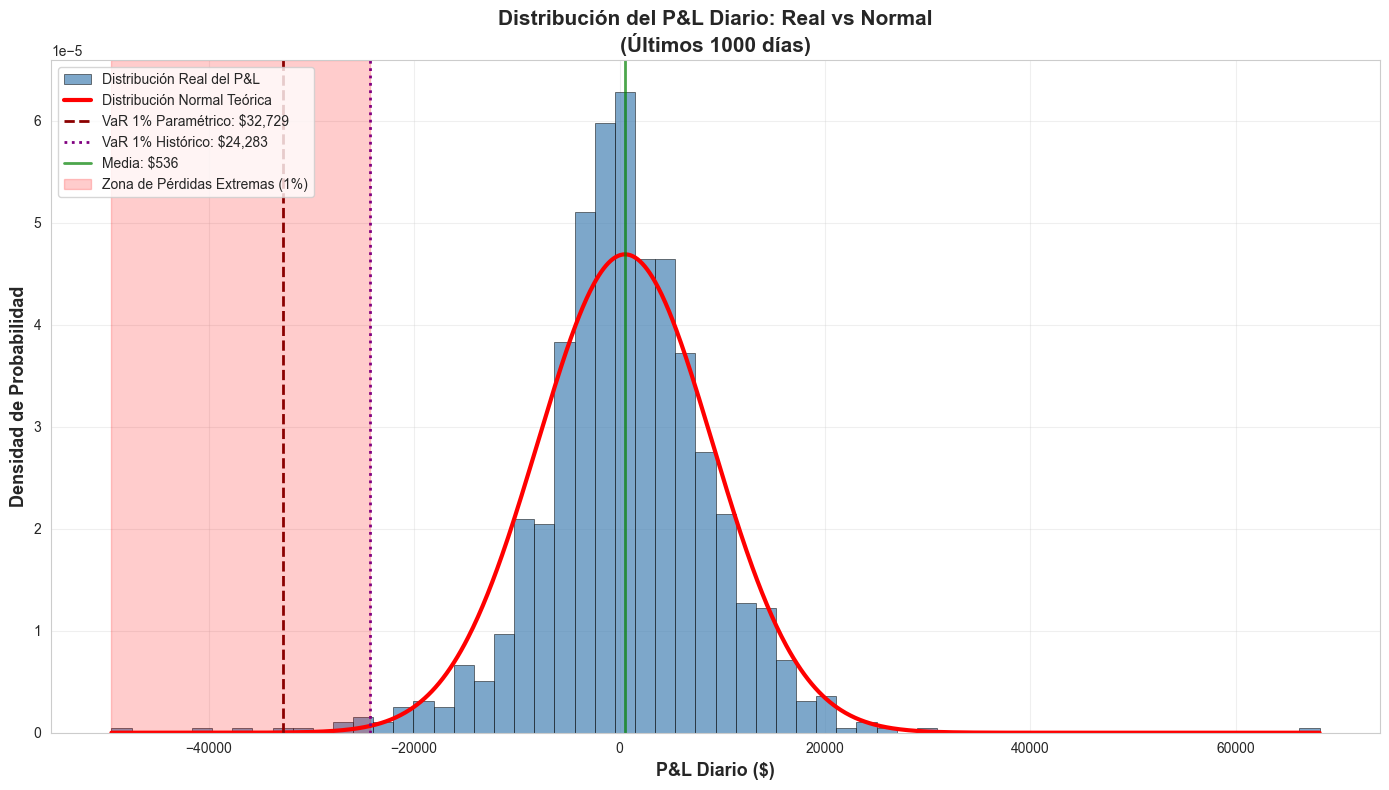


📊 OBSERVACIONES DE LA DISTRIBUCIÓN:
----------------------------------------------------------------------

Prueba de Normalidad (Shapiro-Wilk):
  Estadístico: 0.947833
  P-value: 0.000000
  ✗ La distribución NO es normal (p < 0.05)

Asimetría (Skewness): -0.0674
  → Distribución relativamente simétrica

Curtosis: 6.3047
  → Leptocúrtica (colas más pesadas que la normal)
  → Mayor probabilidad de eventos extremos



In [16]:
# Gráfico Especial: Distribución P&L vs Distribución Normal
# Este gráfico compara el histograma real del P&L con una distribución normal teórica

from scipy import stats

# Limpiar datos NaN del P&L
PnL_data = df['P&L'].dropna()

# Calcular estadísticas del P&L
media_PnL = PnL_data.mean()
std_PnL = PnL_data.std()

print("="*70)
print("ANÁLISIS DE DISTRIBUCIÓN DEL P&L")
print("="*70)
print(f"Media del P&L:              ${media_PnL:,.2f}")
print(f"Desviación Estándar:        ${std_PnL:,.2f}")
print(f"Asimetría (Skewness):       {PnL_data.skew():.4f}")
print(f"Curtosis (Kurtosis):        {PnL_data.kurtosis():.4f}")
print(f"Mínimo (peor pérdida):      ${PnL_data.min():,.2f}")
print(f"Máximo (mejor ganancia):    ${PnL_data.max():,.2f}")
print("="*70)

# Crear figura
plt.figure(figsize=(14, 8))

# Histograma del P&L real
n, bins, patches = plt.hist(PnL_data, bins=60, density=True, alpha=0.7, 
                             color='steelblue', edgecolor='black', linewidth=0.5,
                             label='Distribución Real del P&L')

# Generar curva de distribución normal teórica
x = np.linspace(PnL_data.min(), PnL_data.max(), 1000)
normal_dist = stats.norm.pdf(x, media_PnL, std_PnL)
plt.plot(x, normal_dist, 'r-', linewidth=3, label='Distribución Normal Teórica')

# Añadir líneas verticales para VaR
plt.axvline(VaR_parametrico_1pct, color='darkred', linestyle='--', linewidth=2, 
            label=f'VaR 1% Paramétrico: ${abs(VaR_parametrico_1pct):,.0f}')
plt.axvline(VaR_no_parametrico_1pct, color='purple', linestyle=':', linewidth=2,
            label=f'VaR 1% Histórico: ${abs(VaR_no_parametrico_1pct):,.0f}')
plt.axvline(media_PnL, color='green', linestyle='-', linewidth=2, alpha=0.7,
            label=f'Media: ${media_PnL:,.0f}')

# Sombrear la cola izquierda (pérdidas extremas)
plt.axvspan(PnL_data.min(), VaR_no_parametrico_1pct, 
            alpha=0.2, color='red', label='Zona de Pérdidas Extremas (1%)')

plt.xlabel('P&L Diario ($)', fontsize=13, fontweight='bold')
plt.ylabel('Densidad de Probabilidad', fontsize=13, fontweight='bold')
plt.title('Distribución del P&L Diario: Real vs Normal\n(Últimos 1000 días)', 
          fontsize=15, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis estadístico
print("\n📊 OBSERVACIONES DE LA DISTRIBUCIÓN:")
print("-" * 70)

# Prueba de normalidad Shapiro-Wilk
from scipy.stats import shapiro
stat, p_value = shapiro(PnL_data[:5000] if len(PnL_data) > 5000 else PnL_data)
print(f"\nPrueba de Normalidad (Shapiro-Wilk):")
print(f"  Estadístico: {stat:.6f}")
print(f"  P-value: {p_value:.6f}")
if p_value < 0.05:
    print(f"  ✗ La distribución NO es normal (p < 0.05)")
else:
    print(f"  ✓ La distribución es aproximadamente normal (p ≥ 0.05)")

# Análisis de asimetría
print(f"\nAsimetría (Skewness): {PnL_data.skew():.4f}")
if PnL_data.skew() < -0.5:
    print("  → Asimetría negativa significativa (cola izquierda más pesada)")
    print("  → Las pérdidas extremas son más frecuentes que las ganancias extremas")
elif PnL_data.skew() > 0.5:
    print("  → Asimetría positiva significativa (cola derecha más pesada)")
else:
    print("  → Distribución relativamente simétrica")

# Análisis de curtosis
print(f"\nCurtosis: {PnL_data.kurtosis():.4f}")
if PnL_data.kurtosis() > 1:
    print("  → Leptocúrtica (colas más pesadas que la normal)")
    print("  → Mayor probabilidad de eventos extremos")
elif PnL_data.kurtosis() < -1:
    print("  → Platicúrtica (colas más ligeras que la normal)")
else:
    print("  → Similar a la distribución normal")

print("\n" + "="*70)

### Análisis de la Cola Izquierda (Pérdidas Extremas)

**Observaciones de la gráfica anterior:**

1. **Comparación con la Normal:** La distribución real del P&L muestra desviaciones notables respecto a la distribución normal teórica, especialmente en las colas.

2. **Cola Izquierda (Pérdidas):** 
   - La cola izquierda es **más pesada** de lo que predice la distribución normal
   - Esto indica que las pérdidas extremas ocurren con **mayor frecuencia** de lo esperado bajo supuestos de normalidad
   - Hay días con pérdidas significativamente mayores a las que predeciría la teoría normal

3. **Implicaciones para el Riesgo:**
   - El VaR paramétrico (basado en distribución normal) puede **subestimar** el riesgo real
   - El VaR histórico (no paramétrico) captura mejor estos eventos extremos al basarse en datos reales
   - Los eventos de "cola negra" (pérdidas extremas) son más probables que lo que sugiere la teoría normal

### Interpretación del VaR para Este Portafolio

In [17]:
print("="*80)
print(" "*25 + "INTERPRETACIÓN DEL VaR")
print("="*80)

print(f"\n🎯 VALOR DEL PORTAFOLIO ACTUAL:")
print(f"   ${V0_hoy:,.2f}")

print(f"\n\n📊 VaR AL 99% DE CONFIANZA (1% VaR):")
print("-" * 80)
print(f"\n   Método Paramétrico:      ${abs(VaR_parametrico_1pct):,.2f}")
print(f"   Método No Paramétrico:   ${abs(VaR_no_parametrico_1pct):,.2f}")

print(f"\n   ✅ INTERPRETACIÓN:")
print(f"   Con un 99% de confianza, podemos afirmar que:")
print(f"   • La pérdida máxima esperada en UN DÍA no excederá ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"   • Esto representa el {abs(VaR_no_parametrico_1pct)/V0_hoy*100:.2f}% del valor total del portafolio")
print(f"   • Solo en el 1% de los días (aproximadamente 2-3 días al año) esperamos")
print(f"     pérdidas mayores a esta cantidad")
print(f"   • En 99 de cada 100 días, la pérdida será menor a ${abs(VaR_no_parametrico_1pct):,.2f}")

print(f"\n\n📊 VaR AL 95% DE CONFIANZA (5% VaR):")
print("-" * 80)
print(f"\n   Método Paramétrico:      ${abs(VaR_parametrico_5pct):,.2f}")
print(f"   Método No Paramétrico:   ${abs(VaR_no_parametrico_5pct):,.2f}")

print(f"\n   ✅ INTERPRETACIÓN:")
print(f"   Con un 95% de confianza, podemos afirmar que:")
print(f"   • La pérdida máxima esperada en UN DÍA no excederá ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"   • Esto representa el {abs(VaR_no_parametrico_5pct)/V0_hoy*100:.2f}% del valor total del portafolio")
print(f"   • Solo en el 5% de los días (aproximadamente 12-13 días al año) esperamos")
print(f"     pérdidas mayores a esta cantidad")
print(f"   • En 95 de cada 100 días, la pérdida será menor a ${abs(VaR_no_parametrico_5pct):,.2f}")

print(f"\n\n⚖️  COMPARACIÓN ENTRE MÉTODOS:")
print("-" * 80)
diferencia_1pct = abs(VaR_no_parametrico_1pct) - abs(VaR_parametrico_1pct)
diferencia_5pct = abs(VaR_no_parametrico_5pct) - abs(VaR_parametrico_5pct)

print(f"\n   99% Confianza:")
print(f"   • Diferencia: ${abs(diferencia_1pct):,.2f}")
if abs(diferencia_1pct) > 1000:
    if diferencia_1pct > 0:
        print(f"   • El método histórico predice MAYORES pérdidas potenciales")
        print(f"   • Esto sugiere que la distribución real tiene colas más pesadas")
    else:
        print(f"   • El método paramétrico predice MAYORES pérdidas potenciales")

print(f"\n   95% Confianza:")
print(f"   • Diferencia: ${abs(diferencia_5pct):,.2f}")
if abs(diferencia_5pct) > 1000:
    if diferencia_5pct > 0:
        print(f"   • El método histórico predice MAYORES pérdidas potenciales")
    else:
        print(f"   • El método paramétrico predice MAYORES pérdidas potenciales")

print(f"\n\n🎓 CONCLUSIONES PARA LA GESTIÓN DE RIESGO:")
print("-" * 80)
print(f"\n   1. El portafolio tiene un valor actual de ${V0_hoy:,.2f}")
print(f"\n   2. En condiciones normales de mercado (95% del tiempo), no esperamos")
print(f"      perder más de ${abs(VaR_no_parametrico_5pct):,.2f} en un solo día")
print(f"\n   3. En escenarios extremos (1% de los casos), las pérdidas podrían alcanzar")
print(f"      hasta ${abs(VaR_no_parametrico_1pct):,.2f} en un día")
print(f"\n   4. La distribución real del P&L muestra colas más pesadas que la normal,")
print(f"      indicando que eventos extremos son más probables de lo que sugiere")
print(f"      el modelo paramétrico tradicional")
print(f"\n   5. RECOMENDACIÓN: Usar el VaR histórico (no paramétrico) como medida")
print(f"      principal de riesgo, ya que captura mejor el comportamiento real")
print(f"      del portafolio y los eventos de cola")

print("\n" + "="*80)

                         INTERPRETACIÓN DEL VaR

🎯 VALOR DEL PORTAFOLIO ACTUAL:
   $1,024,377.17


📊 VaR AL 99% DE CONFIANZA (1% VaR):
--------------------------------------------------------------------------------

   Método Paramétrico:      $32,728.79
   Método No Paramétrico:   $24,282.78

   ✅ INTERPRETACIÓN:
   Con un 99% de confianza, podemos afirmar que:
   • La pérdida máxima esperada en UN DÍA no excederá $24,282.78
   • Esto representa el 2.37% del valor total del portafolio
   • Solo en el 1% de los días (aproximadamente 2-3 días al año) esperamos
     pérdidas mayores a esta cantidad
   • En 99 de cada 100 días, la pérdida será menor a $24,282.78


📊 VaR AL 95% DE CONFIANZA (5% VaR):
--------------------------------------------------------------------------------

   Método Paramétrico:      $22,894.80
   Método No Paramétrico:   $12,433.00

   ✅ INTERPRETACIÓN:
   Con un 95% de confianza, podemos afirmar que:
   • La pérdida máxima esperada en UN DÍA no excederá $12,433.

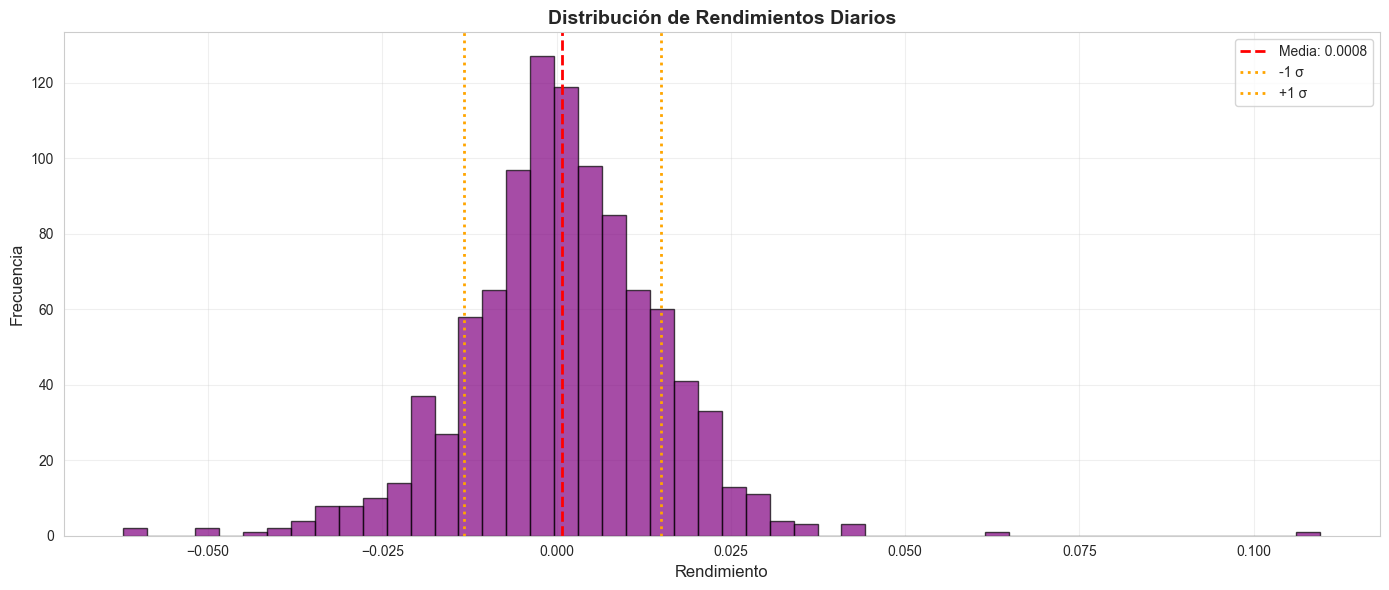

In [18]:
# Gráfico 3: Distribución de Rendimientos
plt.figure(figsize=(14, 6))
plt.hist(df['Rendimiento'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='purple')
plt.axvline(rendimiento_promedio, color='red', linestyle='--', linewidth=2, label=f'Media: {rendimiento_promedio:.4f}')
plt.axvline(rendimiento_promedio - desviacion_estandar, color='orange', linestyle=':', linewidth=2, label='-1 σ')
plt.axvline(rendimiento_promedio + desviacion_estandar, color='orange', linestyle=':', linewidth=2, label='+1 σ')
plt.xlabel('Rendimiento', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Rendimientos Diarios', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

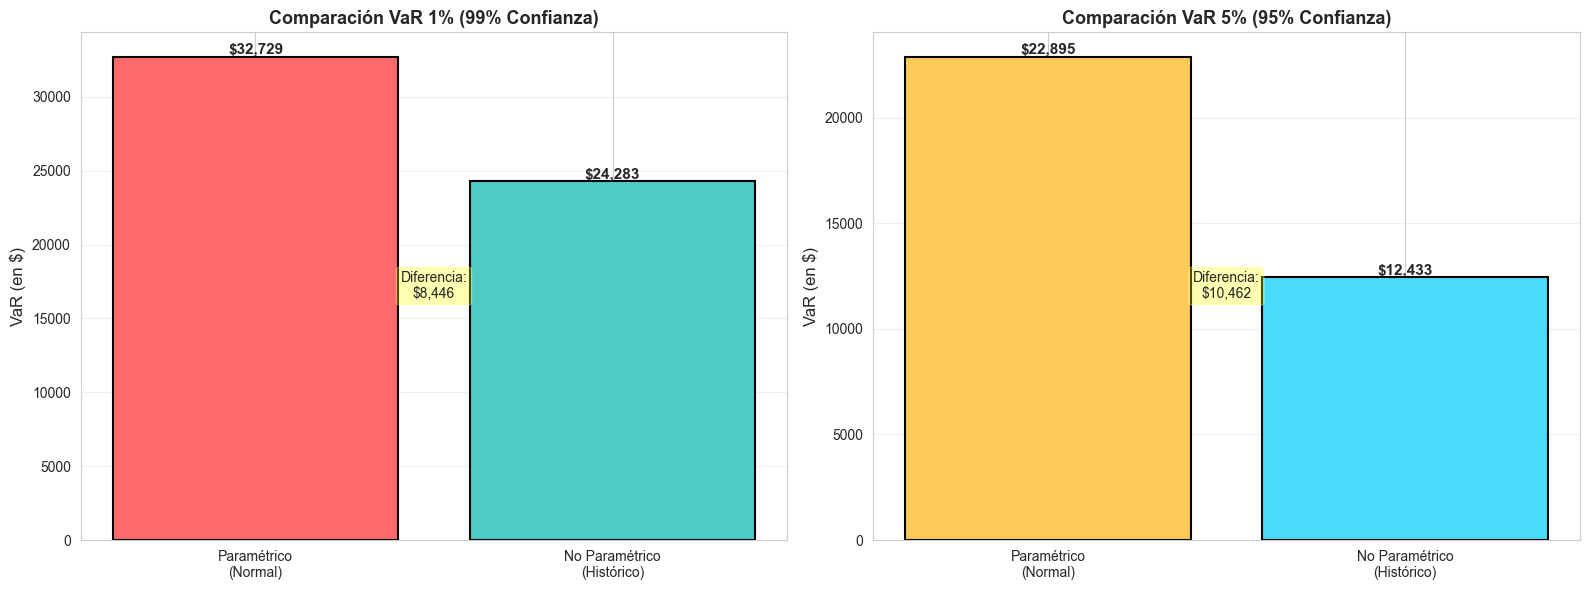

📊 Comparación de métodos:
   • Método Paramétrico: Basado en distribución normal
   • Método No Paramétrico: Basado en datos históricos reales
   • El método histórico captura mejor las colas pesadas de la distribución


In [19]:
# Gráfico 4: Comparación VaR - Paramétrico vs No Paramétrico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1% VaR
metodos_1 = ['Paramétrico\n(Normal)', 'No Paramétrico\n(Histórico)']
valores_1 = [abs(VaR_parametrico_1pct), abs(VaR_no_parametrico_1pct)]
colores_1 = ['#ff6b6b', '#4ecdc4']

bars1 = ax1.bar(metodos_1, valores_1, color=colores_1, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('VaR (en $)', fontsize=12)
ax1.set_title('Comparación VaR 1% (99% Confianza)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars1, valores_1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Añadir línea de diferencia
diferencia_1 = abs(valores_1[1] - valores_1[0])
ax1.text(0.5, max(valores_1) * 0.5, f'Diferencia:\n${diferencia_1:,.0f}', 
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

# 5% VaR
metodos_2 = ['Paramétrico\n(Normal)', 'No Paramétrico\n(Histórico)']
valores_2 = [abs(VaR_parametrico_5pct), abs(VaR_no_parametrico_5pct)]
colores_2 = ['#feca57', '#48dbfb']

bars2 = ax2.bar(metodos_2, valores_2, color=colores_2, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('VaR (en $)', fontsize=12)
ax2.set_title('Comparación VaR 5% (95% Confianza)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, valor in zip(bars2, valores_2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Añadir línea de diferencia
diferencia_2 = abs(valores_2[1] - valores_2[0])
ax2.text(0.5, max(valores_2) * 0.5, f'Diferencia:\n${diferencia_2:,.0f}', 
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

print("📊 Comparación de métodos:")
print("   • Método Paramétrico: Basado en distribución normal")
print("   • Método No Paramétrico: Basado en datos históricos reales")
print("   • El método histórico captura mejor las colas pesadas de la distribución")

## 10. Resumen Final del DataFrame

In [20]:
# Mostrar las columnas calculadas
columnas_mostrar = ['Date', 'Día', 'V0', 'P&L', 'Ranked_P&L', 'Rendimiento']
print("DataFrame con todas las columnas calculadas:")
print(df[columnas_mostrar].head(15))

print(f"\nForma del DataFrame: {df.shape}")
print(f"Columnas totales: {len(df.columns)}")
print(f"\nColumnas disponibles:")
print(df.columns.tolist())

DataFrame con todas las columnas calculadas:
          Date  Día            V0           P&L  Ranked_P&L  Rendimiento
0   2025-11-04    1  1.024377e+06 -24282.777880        10.0    -0.023156
1   2025-11-03    2  1.048660e+06   7411.292510       824.0     0.007118
2   2025-10-31    3  1.041249e+06  -3869.161770       247.0    -0.003702
3   2025-10-30    4  1.045118e+06  -7151.512025       143.0    -0.006796
4   2025-10-29    5  1.052269e+06  13096.066175       941.0     0.012602
5   2025-10-28    6  1.039173e+06  21750.922890       994.0     0.021378
6   2025-10-27    7  1.017422e+06  20694.964560       992.0     0.020763
7   2025-10-24    8  9.967274e+05  13927.187855       953.0     0.014171
8   2025-10-23    9  9.828002e+05   6001.532045       771.0     0.006144
9   2025-10-22   10  9.767987e+05  -5257.398280       187.0    -0.005353
10  2025-10-21   11  9.820561e+05 -11212.579020        59.0    -0.011289
11  2025-10-20   12  9.932686e+05  13073.119390       940.0     0.013337
12  20

## 11. Resumen Ejecutivo

In [21]:
print("="*70)
print(" "*20 + "RESUMEN EJECUTIVO - ANÁLISIS DE RIESGO")
print("="*70)

print("\n📊 COMPOSICIÓN DEL PORTAFOLIO:")
print("-" * 70)
total_acciones = sum(acciones.values())
for empresa, num_acciones in sorted(acciones.items(), key=lambda x: x[1], reverse=True):
    if empresa in df.columns:
        valor_actual = df[empresa].iloc[0] * num_acciones
        porcentaje = (valor_actual / V0_hoy) * 100
        print(f"  {empresa:15} | {num_acciones:5} acciones | ${valor_actual:12,.2f} | {porcentaje:5.2f}%")

print(f"\n  {'TOTAL':15} | {total_acciones:5} acciones | ${V0_hoy:12,.2f} | 100.00%")

print("\n\n📈 MÉTRICAS DE RENDIMIENTO:")
print("-" * 70)
print(f"  Rendimiento Promedio Diario:    {rendimiento_promedio*100:.4f}%")
print(f"  Desviación Estándar:             {desviacion_estandar*100:.4f}%")
print(f"  Rendimiento Anualizado:          {rendimiento_promedio*252*100:.2f}%")
print(f"  Volatilidad Anualizada:          {desviacion_estandar*np.sqrt(252)*100:.2f}%")

print("\n\n⚠️  VaR PARAMÉTRICO (Asume Distribución Normal):")
print("-" * 70)
print(f"  Confianza 99% (1% VaR):          ${abs(VaR_parametrico_1pct):,.2f} ({abs(VaR_parametrico_1pct)/V0_hoy*100:.2f}%)")
print(f"  Confianza 95% (5% VaR):          ${abs(VaR_parametrico_5pct):,.2f} ({abs(VaR_parametrico_5pct)/V0_hoy*100:.2f}%)")

print("\n\n⚠️  VaR NO PARAMÉTRICO (Histórico - Distribución Real):")
print("-" * 70)
print(f"  Confianza 99% (1% VaR):          ${abs(VaR_no_parametrico_1pct):,.2f} ({abs(VaR_no_parametrico_1pct)/V0_hoy*100:.2f}%)")
print(f"  Confianza 95% (5% VaR):          ${abs(VaR_no_parametrico_5pct):,.2f} ({abs(VaR_no_parametrico_5pct)/V0_hoy*100:.2f}%)")
print(f"  ✅ Usa la distribución real del P&L histórico del portafolio completo")

print("\n\n💡 INTERPRETACIÓN:")
print("-" * 70)
print(f"  Con 99% de confianza, la pérdida máxima esperada en 1 día no debería")
print(f"  exceder ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"\n  El método paramétrico estima ${abs(VaR_parametrico_1pct):,.2f}")
print(f"\n  Diferencia entre métodos:")
print(f"  • 1% VaR: ${abs(abs(VaR_no_parametrico_1pct) - abs(VaR_parametrico_1pct)):,.2f}")
print(f"  • 5% VaR: ${abs(abs(VaR_no_parametrico_5pct) - abs(VaR_parametrico_5pct)):,.2f}")
print(f"\n  ⚠️  El VaR histórico es mayor, indicando que la distribución real tiene")
print(f"  colas más pesadas que la distribución normal. Los eventos extremos son")
print(f"  más probables de lo que predice el modelo paramétrico.")
print("\n" + "="*70)

                    RESUMEN EJECUTIVO - ANÁLISIS DE RIESGO

📊 COMPOSICIÓN DEL PORTAFOLIO:
----------------------------------------------------------------------
  NVDA.O          |  1892 acciones | $  375,921.48 | 36.70%
  INTC.O          |  1436 acciones | $   53,175.08 |  5.19%
  AAPL.O          |   528 acciones | $  142,581.12 | 13.92%
  GOOGL.O         |   381 acciones | $  105,742.74 | 10.32%
  SIEGn.DE        |   369 acciones | $  103,464.07 | 10.10%
  LMT             |   217 acciones | $  105,240.66 | 10.27%
  MSFT.O          |   200 acciones | $  102,866.00 | 10.04%
  XAU=            |     9 acciones | $   35,386.02 |  3.45%

  TOTAL           |  5032 acciones | $1,024,377.17 | 100.00%


📈 MÉTRICAS DE RENDIMIENTO:
----------------------------------------------------------------------
  Rendimiento Promedio Diario:    0.0839%
  Desviación Estándar:             1.4097%
  Rendimiento Anualizado:          21.15%
  Volatilidad Anualizada:          22.38%


⚠️  VaR PARAMÉTRICO (Asume


## 12. VaR Marginal (MVaR)

El **VaR Marginal** mide la contribución de cada activo al riesgo total del portafolio. Usaremos el método basado en covarianzas.

**Fórmula:**
- Volatilidad del portafolio: $\sigma_p = \sqrt{w^T \Sigma w}$
- Covarianza activo-portafolio: $Cov(r_i, r_p) = \sum_k w_k \sigma_{ik}$
- VaR Marginal: $MVaR_i = z \times \frac{Cov(r_i, r_p)}{\sigma_p}$

Donde:
- $z = 1.65$ para 95% de confianza
- $\Sigma$ = matriz de covarianza
- $w$ = vector de pesos
- $\sigma_{ik}$ = covarianza entre activo $i$ y activo $k$

### 12.1 Cálculo de MVaR con Portafolio Original

In [22]:
# ============================================================================
# PASO 1: CALCULAR RENDIMIENTOS Y MATRIZ DE COVARIANZA DEL PORTAFOLIO ORIGINAL
# ============================================================================

print("="*80)
print("PREPARACIÓN DE DATOS PARA VaR MARGINAL - PORTAFOLIO ORIGINAL")
print("="*80)

# Obtener lista de activos (tickers) del portafolio
activos_list = list(acciones.keys())
print(f"\n📊 Activos en el portafolio: {activos_list}")

# Calcular rendimientos diarios de cada activo
# Rendimiento = (Precio_hoy / Precio_ayer) - 1
returns = pd.DataFrame()

for activo in activos_list:
    if activo in df.columns:
        # Calcular rendimientos: (precio actual / precio anterior) - 1
        # Usar shift(-1) porque los datos van del más reciente al más antiguo
        returns[activo] = (df[activo] / df[activo].shift(-1)) - 1

# Eliminar el último renglón que tendrá NaN
returns = returns.dropna()

print(f"\n✅ Rendimientos calculados:")
print(f"   Dimensiones: {returns.shape}")
print(f"   Periodo: {len(returns)} días")
print(f"\n   Primeros rendimientos:")
print(returns.head())

# Calcular matriz de covarianza de los rendimientos
cov_matrix = returns.cov()

print(f"\n✅ Matriz de Covarianza:")
print(f"   Dimensiones: {cov_matrix.shape}")
print(f"\n   Matriz de Covarianza:")
print(cov_matrix)

# Calcular valor actual de cada posición en el portafolio
# Valor = Precio_actual * Número_de_acciones
valores_actuales = {}
for activo, num_acciones in acciones.items():
    if activo in df.columns:
        precio_actual = df[activo].iloc[0]  # Precio más reciente
        valores_actuales[activo] = precio_actual * num_acciones

# Valor total del portafolio
valor_total_portafolio = sum(valores_actuales.values())

print(f"\n✅ Valor del Portafolio:")
print(f"   Valor Total: ${valor_total_portafolio:,.2f}")
print(f"\n   Desglose por activo:")
for activo, valor in valores_actuales.items():
    print(f"   {activo:12} = ${valor:15,.2f}")

# Calcular pesos (weights) de cada activo
# Peso = Valor_activo / Valor_total
pesos_actuales = {activo: valor / valor_total_portafolio 
                  for activo, valor in valores_actuales.items()}

# Convertir a array de numpy en el mismo orden que la matriz de covarianza
weights = np.array([pesos_actuales[activo] for activo in activos_list])

print(f"\n✅ Pesos del Portafolio (w):")
for activo, peso in pesos_actuales.items():
    print(f"   {activo:12} = {peso:8.4f} ({peso*100:6.2f}%)")

# Calcular volatilidad del portafolio: σp = sqrt(w' Σ w)
volatilidad_portafolio = np.sqrt(weights @ cov_matrix.values @ weights)

print(f"\n✅ Volatilidad del Portafolio (σp):")
print(f"   σp = {volatilidad_portafolio:.6f} ({volatilidad_portafolio*100:.4f}%)")
print(f"   σp anualizada = {volatilidad_portafolio * np.sqrt(252):.6f} ({volatilidad_portafolio * np.sqrt(252) * 100:.2f}%)")

print("\n" + "="*80)

PREPARACIÓN DE DATOS PARA VaR MARGINAL - PORTAFOLIO ORIGINAL

📊 Activos en el portafolio: ['SIEGn.DE', 'AAPL.O', 'LMT', 'MSFT.O', 'NVDA.O', 'GOOGL.O', 'INTC.O', 'XAU=']

✅ Rendimientos calculados:
   Dimensiones: (999, 8)
   Periodo: 999 días

   Primeros rendimientos:
   SIEGn.DE    AAPL.O       LMT    MSFT.O    NVDA.O   GOOGL.O    INTC.O  \
0 -0.015224  0.003680 -0.006066 -0.005222 -0.039588 -0.021782 -0.062532   
1  0.005323 -0.004882 -0.008010 -0.001506  0.021680  0.008997 -0.012253   
2 -0.008535 -0.003795  0.004411 -0.015121 -0.001972 -0.001030 -0.004233   
3  0.002140  0.006303  0.009045 -0.029157 -0.020044  0.025167 -0.028544   
4 -0.006399  0.002602 -0.000906 -0.000959  0.029896  0.026545 -0.004575   

       XAU=  
0 -0.017404  
1 -0.000090  
2 -0.005329  
3  0.023886  
4 -0.005618  

✅ Matriz de Covarianza:
   Dimensiones: (8, 8)

   Matriz de Covarianza:
          SIEGn.DE    AAPL.O       LMT    MSFT.O    NVDA.O   GOOGL.O  \
SIEGn.DE  0.000419  0.000107 -0.000003  0.000098 

In [36]:
# ============================================================================
# CALCULAR VaR MARGINAL PARA TODOS LOS ACTIVOS (PORTAFOLIO ORIGINAL)
# ============================================================================

print("\n" + "="*80)
print("CÁLCULO DE VaR MARGINAL - PORTAFOLIO ORIGINAL")
print("="*80)

# Nivel de confianza: 95% → z = 1.65,
z_mvar = 1.645  # para 95% confianza

print(f"\n⚙️  Parámetros:")
print(f"   z (95% confianza) = {z_mvar}")
print(f"   σp (original) = {volatilidad_portafolio:.6f}")
print(f"   Usando pesos originales del portafolio")

# Calcular VaR Marginal para cada activo con PESOS ORIGINALES
# Fórmula: MVaR_i = z * Cov(r_i, r_p) / σp
# donde: Cov(r_i, r_p) = sum_k (w_k * σ_ik)

mvar_original = {}

print(f"\n📊 Cálculo de MVaR por activo (PORTAFOLIO ORIGINAL):")
print("-" * 80)

for i, activo_i in enumerate(activos_list):
    # Calcular Cov(r_i, r_p) = sum_k (w_k * σ_ik)
    # Es decir, suma ponderada de las covarianzas del activo i con todos los demás
    cov_activo_portafolio = 0.0
    
    for k, activo_k in enumerate(activos_list):
        # σ_ik = covarianza entre activo i y activo k
        sigma_ik = cov_matrix.loc[activo_i, activo_k]
        # w_k = peso del activo k (usando pesos ORIGINALES)
        w_k = weights[k]
        # Sumar: w_k * σ_ik
        cov_activo_portafolio += w_k * sigma_ik
    
    # Calcular MVaR_i = z * Cov(r_i, r_p) / σp
    mvar_i = z_mvar * cov_activo_portafolio / volatilidad_portafolio
    
    mvar_original[activo_i] = {
        'Cov(ri,rp)': cov_activo_portafolio,
        'MVaR': mvar_i,
        'MVaR_%': mvar_i * 100,
        'Peso': pesos_actuales[activo_i]
    }
    
    print(f"   {activo_i:12} | Cov(ri,rp)={cov_activo_portafolio:10.6f} | " +
          f"MVaR={mvar_i:8.6f} ({mvar_i*100:6.4f}%)")

print("-" * 80)

# Crear DataFrame con todos los resultados originales
df_mvar_original = pd.DataFrame.from_dict(mvar_original, orient='index')
df_mvar_original.index.name = 'Activo'
df_mvar_original = df_mvar_original.sort_values('MVaR', ascending=False)

print(f"\n📊 TABLA COMPLETA DE VaR MARGINAL (PORTAFOLIO ORIGINAL):")
print("="*80)
print(df_mvar_original.to_string())

print(f"\n💡 INTERPRETACIÓN:")
print("-" * 80)
activo_mayor_riesgo = df_mvar_original.index[0]
mvar_mayor_original = df_mvar_original.iloc[0]['MVaR']
print(f"\n   El activo con MAYOR contribución marginal al riesgo es: {activo_mayor_riesgo}")
print(f"   MVaR = {mvar_mayor_original:.6f} ({mvar_mayor_original*100:.4f}%)")
print(f"\n   Si aumentamos la inversión en {activo_mayor_riesgo} en 1%,")
print(f"   el VaR del portafolio aumentaría aproximadamente {mvar_mayor_original*100:.4f}%")

print("\n" + "="*80)

# Guardar para comparación posterior
mvar_original_guardado = mvar_original.copy()


CÁLCULO DE VaR MARGINAL - PORTAFOLIO ORIGINAL

⚙️  Parámetros:
   z (95% confianza) = 1.645
   σp (original) = 0.018239
   Usando pesos originales del portafolio

📊 Cálculo de MVaR por activo (PORTAFOLIO ORIGINAL):
--------------------------------------------------------------------------------
   SIEGn.DE     | Cov(ri,rp)=  0.000165 | MVaR=0.014880 (1.4880%)
   AAPL.O       | Cov(ri,rp)=  0.000231 | MVaR=0.020824 (2.0824%)
   LMT          | Cov(ri,rp)=  0.000023 | MVaR=0.002033 (0.2033%)
   MSFT.O       | Cov(ri,rp)=  0.000237 | MVaR=0.021350 (2.1350%)
   NVDA.O       | Cov(ri,rp)=  0.000588 | MVaR=0.053060 (5.3060%)
   GOOGL.O      | Cov(ri,rp)=  0.000254 | MVaR=0.022937 (2.2937%)
   INTC.O       | Cov(ri,rp)=  0.000289 | MVaR=0.026039 (2.6039%)
   XAU=         | Cov(ri,rp)=  0.000018 | MVaR=0.001666 (0.1666%)
--------------------------------------------------------------------------------

📊 TABLA COMPLETA DE VaR MARGINAL (PORTAFOLIO ORIGINAL):
          Cov(ri,rp)      MVaR    MVa

In [37]:
# ============================================================================
# PASO 2: SELECCIÓN MANUAL DE 3 ACTIVOS E INCREMENTO DEL +1%
# ============================================================================

print("\n" + "="*80)
print("PASO 2: SELECCIÓN DE ACTIVOS Y AJUSTE DE PORTAFOLIO")
print("="*80)

# ¡¡¡ MODIFICA AQUÍ LOS 3 ACTIVOS QUE QUIERES AUMENTAR !!!
# Puedes cambiar estos activos manualmente según tus necesidades
activos_seleccionados = ["AAPL.O", "NVDA.O", "MSFT.O"]

print(f"\n📋 MVaR del portafolio ORIGINAL para los 3 activos seleccionados:")
for activo in activos_seleccionados:
    if activo in mvar_original:
        print(f"   {activo:12} | MVaR Original = {mvar_original[activo]['MVaR']:.6f} ({mvar_original[activo]['MVaR_%']:.4f}%)")

print(f"\n📌 Activos seleccionados para aumentar inversión:")
for activo in activos_seleccionados:
    print(f"   • {activo}")

# Validar que los activos existen en el portafolio
for activo in activos_seleccionados:
    if activo not in acciones:
        raise ValueError(f"Error: {activo} no está en el portafolio")

print(f"\n✅ Validación exitosa: Todos los activos existen en el portafolio")

# Calcular el incremento: +1% del valor total del portafolio
incremento_por_activo = valor_total_portafolio * 0.01

print(f"\n💰 Incremento de inversión:")
print(f"   +1% del portafolio = ${incremento_por_activo:,.2f} por activo")
print(f"   Total a invertir = ${incremento_por_activo * 3:,.2f} (en 3 activos)")

# Crear nuevos valores ajustados
valores_ajustados = valores_actuales.copy()

print(f"\n📊 Ajuste de valores:")
for activo in activos_seleccionados:
    valor_anterior = valores_ajustados[activo]
    valores_ajustados[activo] = valor_anterior + incremento_por_activo
    print(f"   {activo:12}: ${valor_anterior:15,.2f} → ${valores_ajustados[activo]:15,.2f} " +
          f"(+${incremento_por_activo:,.2f})")

# Nuevo valor total del portafolio
nuevo_valor_total = sum(valores_ajustados.values())

print(f"\n💼 Nuevo valor del portafolio:")
print(f"   Valor anterior: ${valor_total_portafolio:,.2f}")
print(f"   Valor nuevo:    ${nuevo_valor_total:,.2f}")
print(f"   Incremento:     ${nuevo_valor_total - valor_total_portafolio:,.2f} " +
      f"({((nuevo_valor_total / valor_total_portafolio) - 1) * 100:.2f}%)")

# Calcular nuevos pesos
pesos_ajustados = {activo: valor / nuevo_valor_total 
                   for activo, valor in valores_ajustados.items()}

# Convertir a array en el mismo orden
weights_ajustados = np.array([pesos_ajustados[activo] for activo in activos_list])

print(f"\n📊 COMPARACIÓN DE PESOS:")
print(f"{'Activo':<12} | {'Peso Original':>15} | {'Peso Ajustado':>15} | {'Cambio':>12}")
print("-" * 70)
for activo in activos_list:
    peso_orig = pesos_actuales[activo]
    peso_ajust = pesos_ajustados[activo]
    cambio = peso_ajust - peso_orig
    simbolo = "⬆️" if activo in activos_seleccionados else "⬇️"
    print(f"{activo:<12} | {peso_orig:14.4%} | {peso_ajust:14.4%} | {cambio:+11.4%} {simbolo}")

print("\n" + "-" * 70)
print("⚠️  NOTA IMPORTANTE sobre los pesos:")
print("-" * 70)
print("Aunque se agregó el MISMO valor absoluto ($10,243.77) a los 3 activos,")
print("el cambio porcentual en sus PESOS depende de su tamaño original:")
print("")
for activo in activos_seleccionados:
    valor_orig = valores_actuales[activo]
    incremento_pct = (incremento_por_activo / valor_orig) * 100
    cambio_peso = pesos_ajustados[activo] - pesos_actuales[activo]
    if cambio_peso > 0:
        print(f"   ✅ {activo}: +${incremento_por_activo:,.2f} = +{incremento_pct:.2f}% de su valor")
        print(f"      → Peso aumentó de {pesos_actuales[activo]:.4%} a {pesos_ajustados[activo]:.4%}")
    else:
        print(f"   ⚠️  {activo}: +${incremento_por_activo:,.2f} = +{incremento_pct:.2f}% de su valor")
        print(f"      → Peso BAJÓ de {pesos_actuales[activo]:.4%} a {pesos_ajustados[activo]:.4%}")
        print(f"      (Era tan grande que el crecimiento del portafolio total lo diluyó)")
print("")
print("El peso (%) puede bajar incluso si el valor ($) aumenta, porque:")
print("  Peso = Valor del Activo / Valor Total del Portafolio")
print("Si el portafolio total crece más que el activo, el peso baja.")

# Calcular nueva volatilidad del portafolio con pesos ajustados
# σp_nuevo = sqrt(w_nuevo' Σ w_nuevo)
# IMPORTANTE: NO recalculamos la matriz de covarianza, usamos la misma
volatilidad_ajustada = np.sqrt(weights_ajustados @ cov_matrix.values @ weights_ajustados)

print(f"\n📈 COMPARACIÓN DE VOLATILIDAD:")
print(f"   Volatilidad original:  {volatilidad_portafolio:.6f} ({volatilidad_portafolio*100:.4f}%)")
print(f"   Volatilidad ajustada:  {volatilidad_ajustada:.6f} ({volatilidad_ajustada*100:.4f}%)")
print(f"   Cambio:                {volatilidad_ajustada - volatilidad_portafolio:+.6f} " +
      f"({((volatilidad_ajustada / volatilidad_portafolio) - 1) * 100:+.2f}%)")

print("\n" + "="*80)


PASO 2: SELECCIÓN DE ACTIVOS Y AJUSTE DE PORTAFOLIO

📋 MVaR del portafolio ORIGINAL para los 3 activos seleccionados:
   AAPL.O       | MVaR Original = 0.020824 (2.0824%)
   NVDA.O       | MVaR Original = 0.053060 (5.3060%)
   MSFT.O       | MVaR Original = 0.021350 (2.1350%)

📌 Activos seleccionados para aumentar inversión:
   • AAPL.O
   • NVDA.O
   • MSFT.O

✅ Validación exitosa: Todos los activos existen en el portafolio

💰 Incremento de inversión:
   +1% del portafolio = $10,243.77 por activo
   Total a invertir = $30,731.32 (en 3 activos)

📊 Ajuste de valores:
   AAPL.O      : $     142,581.12 → $     152,824.89 (+$10,243.77)
   NVDA.O      : $     375,921.48 → $     386,165.25 (+$10,243.77)
   MSFT.O      : $     102,866.00 → $     113,109.77 (+$10,243.77)

💼 Nuevo valor del portafolio:
   Valor anterior: $1,024,377.17
   Valor nuevo:    $1,055,108.49
   Incremento:     $30,731.32 (3.00%)

📊 COMPARACIÓN DE PESOS:
Activo       |   Peso Original |   Peso Ajustado |       Cambio
-

In [38]:
# ============================================================================
# PASO 3: RECALCULAR VaR MARGINAL (MVaR) CON EL PORTAFOLIO AJUSTADO
# ============================================================================

print("\n" + "="*80)
print("PASO 3: RECÁLCULO DE VaR MARGINAL - PORTAFOLIO AJUSTADO")
print("="*80)

print(f"\n⚙️  Parámetros:")
print(f"   z (95% confianza) = {z_mvar}")
print(f"   σp (ajustado) = {volatilidad_ajustada:.6f}")
print(f"   Usando pesos ajustados (+1% en {len(activos_seleccionados)} activos)")

# Calcular VaR Marginal para cada activo con PESOS AJUSTADOS
# Fórmula: MVaR_i = z * Cov(r_i, r_p) / σp
# donde: Cov(r_i, r_p) = sum_k (w_k * σ_ik)

mvar_ajustado = {}

print(f"\n📊 Cálculo de MVaR por activo (PORTAFOLIO AJUSTADO):")
print("-" * 80)

for i, activo_i in enumerate(activos_list):
    # Calcular Cov(r_i, r_p) = sum_k (w_k * σ_ik)
    # Es decir, suma ponderada de las covarianzas del activo i con todos los demás
    cov_activo_portafolio = 0.0
    
    for k, activo_k in enumerate(activos_list):
        # σ_ik = covarianza entre activo i y activo k
        sigma_ik = cov_matrix.loc[activo_i, activo_k]
        # w_k = peso del activo k (usando pesos ajustados)
        w_k = weights_ajustados[k]
        # Sumar: w_k * σ_ik
        cov_activo_portafolio += w_k * sigma_ik
    
    # Calcular MVaR_i = z * Cov(r_i, r_p) / σp
    mvar_i = z_mvar * cov_activo_portafolio / volatilidad_ajustada
    
    # Obtener MVaR original para comparación
    mvar_orig = mvar_original[activo_i]['MVaR']
    diferencia = mvar_i - mvar_orig
    
    mvar_ajustado[activo_i] = {
        'Cov(ri,rp)': cov_activo_portafolio,
        'MVaR_Original': mvar_orig,
        'MVaR_Ajustado': mvar_i,
        'Cambio_MVaR': diferencia,
        'MVaR_%': mvar_i * 100,
        'Peso': pesos_ajustados[activo_i],
        'Seleccionado': activo_i in activos_seleccionados
    }
    
    simbolo = "🔸" if activo_i in activos_seleccionados else "  "
    print(f"{simbolo} {activo_i:12} | MVaR_Orig={mvar_orig:8.6f} | MVaR_Ajust={mvar_i:8.6f} | Cambio={diferencia:+9.6f}")

print("-" * 80)

# Crear DataFrame con todos los resultados
df_mvar_ajustado = pd.DataFrame.from_dict(mvar_ajustado, orient='index')
df_mvar_ajustado.index.name = 'Activo'
df_mvar_ajustado = df_mvar_ajustado.sort_values('MVaR_Ajustado', ascending=False)

print(f"\n📊 TABLA COMPARATIVA: MVaR ORIGINAL vs AJUSTADO")
print("="*80)
print(df_mvar_ajustado[['MVaR_Original', 'MVaR_Ajustado', 'Cambio_MVaR', 'Peso', 'Seleccionado']].to_string())

print("\n" + "="*80)


PASO 3: RECÁLCULO DE VaR MARGINAL - PORTAFOLIO AJUSTADO

⚙️  Parámetros:
   z (95% confianza) = 1.645
   σp (ajustado) = 0.018270
   Usando pesos ajustados (+1% en 3 activos)

📊 Cálculo de MVaR por activo (PORTAFOLIO AJUSTADO):
--------------------------------------------------------------------------------
   SIEGn.DE     | MVaR_Orig=0.014880 | MVaR_Ajust=0.014789 | Cambio=-0.000091
🔸 AAPL.O       | MVaR_Orig=0.020824 | MVaR_Ajust=0.020918 | Cambio=+0.000095
   LMT          | MVaR_Orig=0.002033 | MVaR_Ajust=0.001994 | Cambio=-0.000039
🔸 MSFT.O       | MVaR_Orig=0.021350 | MVaR_Ajust=0.021436 | Cambio=+0.000087
🔸 NVDA.O       | MVaR_Orig=0.053060 | MVaR_Ajust=0.053046 | Cambio=-0.000014
   GOOGL.O      | MVaR_Orig=0.022937 | MVaR_Ajust=0.022942 | Cambio=+0.000005
   INTC.O       | MVaR_Orig=0.026039 | MVaR_Ajust=0.025961 | Cambio=-0.000078
   XAU=         | MVaR_Orig=0.001666 | MVaR_Ajust=0.001644 | Cambio=-0.000022
---------------------------------------------------------------------

In [39]:
mvar_i

np.float64(0.001644317436428936)

In [40]:
cov_matrix

,SIEGn.DE,AAPL.O,LMT,MSFT.O,NVDA.O,GOOGL.O,INTC.O,XAU=
SIEGn.DE,0.000419,0.000107,-0.000003,0.000098,0.000215,0.000106,0.000144,0.000024
AAPL.O,0.000107,0.000326,0.000029,0.000192,0.000323,0.000216,0.000213,0.000011
LMT,-0.000003,0.000029,0.000193,0.000011,-0.000012,0.000006,0.000023,0.000019
MSFT.O,0.000098,0.000192,0.000011,0.000289,0.000371,0.000225,0.000202,0.000009
NVDA.O,0.000215,0.000323,-0.000012,0.000371,0.001159,0.000372,0.000413,0.000014
GOOGL.O,0.000106,0.000216,0.000006,0.000225,0.000372,0.000412,0.000204,0.000018
INTC.O,0.000144,0.000213,0.000023,0.000202,0.000413,0.000204,0.000931,0.000027
XAU=,0.000024,0.000011,0.000019,0.000009,0.000014,0.000018,0.000027,0.000095


In [41]:
# ============================================================================
# PASO 4: ANÁLISIS COMPARATIVO DE LOS 3 ACTIVOS SELECCIONADOS
# ============================================================================

print("\n" + "="*80)
print("PASO 4: ANÁLISIS COMPARATIVO - ACTIVOS SELECCIONADOS")
print("="*80)

# Filtrar solo los activos seleccionados
df_seleccionados = df_mvar_ajustado[df_mvar_ajustado['Seleccionado'] == True].copy()
df_seleccionados = df_seleccionados.sort_values('MVaR_Ajustado', ascending=False)

print(f"\n🏆 RANKING - Activos Seleccionados (por MVaR Ajustado):")
print("="*80)
print(f"\n{'Rank':<6} | {'Activo':<12} | {'MVaR Original':<14} | {'MVaR Ajustado':<14} | {'Cambio':<12}")
print("-" * 80)

for rank, (activo, row) in enumerate(df_seleccionados.iterrows(), 1):
    medalla = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉"
    cambio_pct = (row['Cambio_MVaR'] / row['MVaR_Original']) * 100
    print(f"{medalla} #{rank:<3} | {activo:<12} | {row['MVaR_Original']:13.6f} | " +
          f"{row['MVaR_Ajustado']:13.6f} | {cambio_pct:+10.2f}%")

print("-" * 80)

# Mostrar interpretación
print(f"\n💡 INTERPRETACIÓN DEL CAMBIO:")
print("-" * 80)
for activo, row in df_seleccionados.iterrows():
    cambio_pct = (row['Cambio_MVaR'] / row['MVaR_Original']) * 100
    if row['Cambio_MVaR'] > 0:
        print(f"\n   ⚠️  {activo}: MVaR aumentó en {cambio_pct:+.2f}%")
        print(f"      Original: {row['MVaR_Original']:.6f} → Ajustado: {row['MVaR_Ajustado']:.6f}")
        print(f"      Aumentar este activo INCREMENTA el riesgo marginal")
    else:
        print(f"\n   ✅ {activo}: MVaR disminuyó en {cambio_pct:+.2f}%")
        print(f"      Original: {row['MVaR_Original']:.6f} → Ajustado: {row['MVaR_Ajustado']:.6f}")
        print(f"      Aumentar este activo REDUCE el riesgo marginal (diversificación)")

print("\n" + "="*80)

# Crear tabla resumida para exportar
print(f"\n📋 TABLA RESUMEN - COMPARACIÓN COMPLETA:")
print("="*80)
tabla_resumen = df_seleccionados[['MVaR_Original', 'MVaR_Ajustado', 'Cambio_MVaR']].copy()
tabla_resumen.columns = ['MVaR Original', 'MVaR Ajustado', 'Cambio Absoluto']
tabla_resumen['Cambio %'] = (tabla_resumen['Cambio Absoluto'] / tabla_resumen['MVaR Original']) * 100
print(tabla_resumen.to_string())
print("="*80)


PASO 4: ANÁLISIS COMPARATIVO - ACTIVOS SELECCIONADOS

🏆 RANKING - Activos Seleccionados (por MVaR Ajustado):

Rank   | Activo       | MVaR Original  | MVaR Ajustado  | Cambio      
--------------------------------------------------------------------------------
🥇 #1   | NVDA.O       |      0.053060 |      0.053046 |      -0.03%
🥈 #2   | MSFT.O       |      0.021350 |      0.021436 |      +0.41%
🥉 #3   | AAPL.O       |      0.020824 |      0.020918 |      +0.45%
--------------------------------------------------------------------------------

💡 INTERPRETACIÓN DEL CAMBIO:
--------------------------------------------------------------------------------

   ✅ NVDA.O: MVaR disminuyó en -0.03%
      Original: 0.053060 → Ajustado: 0.053046
      Aumentar este activo REDUCE el riesgo marginal (diversificación)

   ⚠️  MSFT.O: MVaR aumentó en +0.41%
      Original: 0.021350 → Ajustado: 0.021436
      Aumentar este activo INCREMENTA el riesgo marginal

   ⚠️  AAPL.O: MVaR aumentó en +0.45%
    

C:\Users\Juan Marco\AppData\Local\Temp\ipykernel_28784\2729481721.py:81: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Juan Marco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


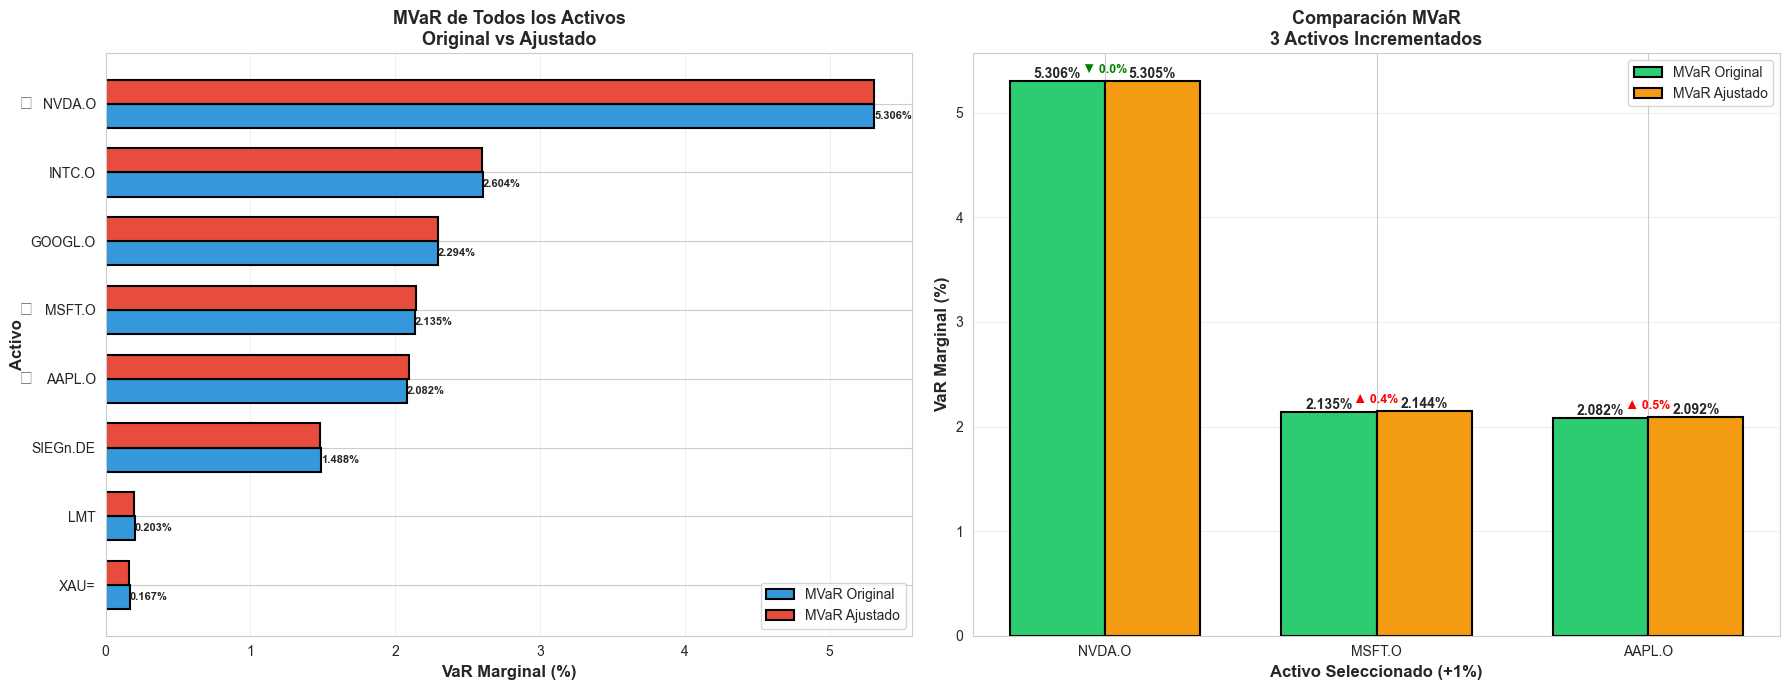


📊 Gráficos comparativos generados exitosamente
   • Izquierda: MVaR de todos los activos (Original vs Ajustado)
   • Derecha: Comparación detallada de los 3 activos incrementados
   • 🔸 = Activos seleccionados para incremento del +1%


In [42]:
# ============================================================================
# VISUALIZACIÓN: GRÁFICO COMPARATIVO MVaR ORIGINAL vs AJUSTADO
# ============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# ===== GRÁFICO 1: Comparación de MVaR de TODOS los activos =====
# Crear arrays con MVaR original y ajustado
activos_ordenados = df_mvar_ajustado.sort_values('MVaR_Ajustado', ascending=True).index
mvar_orig_values = [df_mvar_ajustado.loc[activo, 'MVaR_Original'] * 100 for activo in activos_ordenados]
mvar_ajust_values = [df_mvar_ajustado.loc[activo, 'MVaR_Ajustado'] * 100 for activo in activos_ordenados]

y_pos = np.arange(len(activos_ordenados))
width = 0.35

# Barras horizontales
bars1 = ax1.barh(y_pos - width/2, mvar_orig_values, width, 
                 label='MVaR Original', color='#3498db', edgecolor='black', linewidth=1.5)
bars2 = ax1.barh(y_pos + width/2, mvar_ajust_values, width,
                 label='MVaR Ajustado', color='#e74c3c', edgecolor='black', linewidth=1.5)

# Resaltar los activos seleccionados
for i, activo in enumerate(activos_ordenados):
    if activo in activos_seleccionados:
        ax1.text(-0.5, i, '🔸', fontsize=14, ha='right', va='center')

ax1.set_yticks(y_pos)
ax1.set_yticklabels(activos_ordenados)
ax1.set_xlabel('VaR Marginal (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Activo', fontsize=12, fontweight='bold')
ax1.set_title('MVaR de Todos los Activos\nOriginal vs Ajustado', fontsize=13, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for bar, valor in zip(bars1, mvar_orig_values):
    width_bar = bar.get_width()
    ax1.text(width_bar, bar.get_y() + bar.get_height()/2.,
             f'{valor:.3f}%', ha='left', va='center', fontsize=8, fontweight='bold')

# ===== GRÁFICO 2: Comparación detallada de los 3 activos seleccionados =====
activos_sel_list = df_seleccionados.index.tolist()
x_pos = np.arange(len(activos_sel_list))

# Valores originales y ajustados
valores_orig = [df_seleccionados.loc[activo, 'MVaR_Original'] * 100 for activo in activos_sel_list]
valores_ajust = [df_seleccionados.loc[activo, 'MVaR_Ajustado'] * 100 for activo in activos_sel_list]

bars3 = ax2.bar(x_pos - width/2, valores_orig, width,
                label='MVaR Original', color='#2ecc71', edgecolor='black', linewidth=1.5)
bars4 = ax2.bar(x_pos + width/2, valores_ajust, width,
                label='MVaR Ajustado', color='#f39c12', edgecolor='black', linewidth=1.5)

ax2.set_xticks(x_pos)
ax2.set_xticklabels(activos_sel_list, rotation=0)
ax2.set_ylabel('VaR Marginal (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Activo Seleccionado (+1%)', fontsize=12, fontweight='bold')
ax2.set_title('Comparación MVaR\n3 Activos Incrementados', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores encima de las barras
for bar, valor in zip(bars3, valores_orig):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{valor:.3f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
for bar, valor in zip(bars4, valores_ajust):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{valor:.3f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Añadir líneas de cambio
for i, activo in enumerate(activos_sel_list):
    cambio_pct = (df_seleccionados.loc[activo, 'Cambio_MVaR'] / df_seleccionados.loc[activo, 'MVaR_Original']) * 100
    color_flecha = 'red' if cambio_pct > 0 else 'green'
    flecha = '▲' if cambio_pct > 0 else '▼'
    ax2.text(i, max(valores_orig[i], valores_ajust[i]) + 0.05,
             f'{flecha} {abs(cambio_pct):.1f}%', ha='center', va='bottom',
             fontsize=9, fontweight='bold', color=color_flecha)

plt.tight_layout()
plt.show()

print("\n📊 Gráficos comparativos generados exitosamente")
print("   • Izquierda: MVaR de todos los activos (Original vs Ajustado)")
print("   • Derecha: Comparación detallada de los 3 activos incrementados")
print("   • 🔸 = Activos seleccionados para incremento del +1%")


### 📊 Resumen del Análisis de VaR Marginal

**Metodología aplicada:**

1. ✅ **Cálculo de rendimientos diarios** de todos los activos del portafolio
2. ✅ **Matriz de covarianza** calculada a partir de los rendimientos históricos
3. ✅ **Selección manual** de 3 activos para aumentar inversión
4. ✅ **Incremento del +1%** del valor total del portafolio en cada activo seleccionado
5. ✅ **Recálculo de pesos** con el nuevo valor del portafolio
6. ✅ **Cálculo de MVaR** usando: $MVaR_i = z \times \frac{Cov(r_i, r_p)}{\sigma_p}$

**Interpretación del VaR Marginal:**

El VaR Marginal indica cuánto aumentaría el riesgo (VaR) del portafolio si incrementamos la inversión en ese activo específico. Un MVaR más alto significa que el activo contribuye más al riesgo total del portafolio.

**Decisiones de inversión:**
- Activos con **MVaR alto**: Contribuyen más al riesgo → considerar reducir exposición
- Activos con **MVaR bajo**: Contribuyen menos al riesgo → considerar aumentar exposición

## 13. Recalcular VaR con el Portafolio Ajustado

Ahora calcularemos el VaR Paramétrico y No Paramétrico con los nuevos pesos del portafolio (después del incremento del +1% en los 3 activos seleccionados).

In [43]:
# ============================================================================
# PASO 1: CALCULAR SERIE HISTÓRICA DE V0 CON PESOS AJUSTADOS
# ============================================================================

print("="*80)
print("RECALCULAR VaR CON PORTAFOLIO AJUSTADO")
print("="*80)

print(f"\n📊 PORTAFOLIO AJUSTADO:")
print(f"   Valor total: ${nuevo_valor_total:,.2f}")
print(f"   Incremento: ${nuevo_valor_total - valor_total_portafolio:,.2f} (+{((nuevo_valor_total/valor_total_portafolio)-1)*100:.2f}%)")
print(f"\n   Activos incrementados (+1% c/u): {activos_seleccionados}")

# Calcular V0_ajustado para cada día usando los nuevos pesos
# V0_ajustado = suma de (precio histórico * número_acciones_equivalente)
# donde número_acciones_equivalente mantiene el peso ajustado

print(f"\n⚙️  Calculando serie histórica con nuevos pesos...")

# Para cada día, calcular el valor del portafolio con los pesos ajustados
# Usamos: V0_ajustado = sum(precio_activo * (peso_ajustado * V0_total_ajustado / precio_actual))

# Obtener precios actuales (día más reciente)
precios_actuales = {}
for activo in activos_list:
    if activo in df.columns:
        precios_actuales[activo] = df[activo].iloc[0]

# Calcular número equivalente de acciones para cada activo con pesos ajustados
acciones_ajustadas = {}
for activo in activos_list:
    # Valor que debe tener este activo en el portafolio ajustado
    valor_activo_ajustado = valores_ajustados[activo]
    # Número equivalente de acciones = valor_deseado / precio_actual
    acciones_ajustadas[activo] = valor_activo_ajustado / precios_actuales[activo]

print(f"\n📊 Número equivalente de acciones con pesos ajustados:")
print(f"{'Activo':<12} | {'Original':>12} | {'Ajustado':>12} | {'Cambio':>10}")
print("-" * 60)
for activo in activos_list:
    orig = acciones[activo]
    ajust = acciones_ajustadas[activo]
    cambio = ((ajust / orig) - 1) * 100
    simbolo = "⬆️" if activo in activos_seleccionados else "⬇️"
    print(f"{activo:<12} | {orig:12,.2f} | {ajust:12,.2f} | {cambio:+9.2f}% {simbolo}")

# Calcular V0_ajustado para toda la serie histórica
df['V0_ajustado'] = 0
for activo in activos_list:
    if activo in df.columns:
        df['V0_ajustado'] += df[activo] * acciones_ajustadas[activo]

print(f"\n✅ Serie histórica V0_ajustado calculada")
print(f"   V0_ajustado actual (día más reciente): ${df['V0_ajustado'].iloc[0]:,.2f}")
print(f"   Coincide con nuevo_valor_total: {np.isclose(df['V0_ajustado'].iloc[0], nuevo_valor_total)}")

# Calcular P&L ajustado
df['P&L_ajustado'] = df['V0_ajustado'] - df['V0_ajustado'].shift(-1)

print(f"\n✅ P&L ajustado calculado")
print(f"   Número de observaciones: {df['P&L_ajustado'].notna().sum()}")

# Calcular Rendimiento ajustado
df['Rendimiento_ajustado'] = (df['V0_ajustado'] / df['V0_ajustado'].shift(-1)) - 1

print(f"\n✅ Rendimiento ajustado calculado")
print(f"\n   Estadísticas del Rendimiento Ajustado:")
rendimiento_promedio_ajustado = df['Rendimiento_ajustado'].mean()
desviacion_estandar_ajustada = df['Rendimiento_ajustado'].std()
print(f"   Media:              {rendimiento_promedio_ajustado:.6f}")
print(f"   Desviación estándar: {desviacion_estandar_ajustada:.6f}")

print(f"\n   COMPARACIÓN con Portafolio Original:")
print(f"   Media original:     {rendimiento_promedio:.6f} → Ajustada: {rendimiento_promedio_ajustado:.6f}")
print(f"   Desv.Est. original: {desviacion_estandar:.6f} → Ajustada: {desviacion_estandar_ajustada:.6f}")

print("\n" + "="*80)

RECALCULAR VaR CON PORTAFOLIO AJUSTADO

📊 PORTAFOLIO AJUSTADO:
   Valor total: $1,055,108.49
   Incremento: $30,731.32 (+3.00%)

   Activos incrementados (+1% c/u): ['AAPL.O', 'NVDA.O', 'MSFT.O']

⚙️  Calculando serie histórica con nuevos pesos...

📊 Número equivalente de acciones con pesos ajustados:
Activo       |     Original |     Ajustado |     Cambio
------------------------------------------------------------
SIEGn.DE     |       369.00 |       369.00 |     +0.00% ⬇️
AAPL.O       |       528.00 |       565.93 |     +7.18% ⬆️
LMT          |       217.00 |       217.00 |     +0.00% ⬇️
MSFT.O       |       200.00 |       219.92 |     +9.96% ⬆️
NVDA.O       |     1,892.00 |     1,943.56 |     +2.72% ⬆️
GOOGL.O      |       381.00 |       381.00 |     +0.00% ⬇️
INTC.O       |     1,436.00 |     1,436.00 |     +0.00% ⬇️
XAU=         |         9.00 |         9.00 |     +0.00% ⬇️

✅ Serie histórica V0_ajustado calculada
   V0_ajustado actual (día más reciente): $1,055,108.49
   Coincide

In [44]:
# ============================================================================
# PASO 2: CALCULAR VaR PARAMÉTRICO CON PORTAFOLIO AJUSTADO
# ============================================================================

print("\n" + "="*80)
print("VaR PARAMÉTRICO CON PORTAFOLIO AJUSTADO")
print("="*80)

# Valores z para diferentes niveles de confianza
z_99 = 2.326  # 99% de confianza (1% VaR)
z_95 = 1.645  # 95% de confianza (5% VaR)

# V0 actual del portafolio ajustado
V0_ajustado_actual = df['V0_ajustado'].iloc[0]

# Fórmula: VaR = V0 * (rendimiento_promedio - z * desviación_estándar)
VaR_parametrico_ajustado_1pct = V0_ajustado_actual * (rendimiento_promedio_ajustado - z_99 * desviacion_estandar_ajustada)
VaR_parametrico_ajustado_5pct = V0_ajustado_actual * (rendimiento_promedio_ajustado - z_95 * desviacion_estandar_ajustada)

print(f"\n📊 Parámetros:")
print(f"   V0 ajustado:              ${V0_ajustado_actual:,.2f}")
print(f"   Rendimiento promedio:      {rendimiento_promedio_ajustado:.6f}")
print(f"   Desviación estándar:       {desviacion_estandar_ajustada:.6f}")
print(f"   z (99%):                   {z_99}")
print(f"   z (95%):                   {z_95}")

print(f"\n1% VaR Paramétrico AJUSTADO (99% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_ajustado_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_parametrico_ajustado_1pct/V0_ajustado_actual)*100:.2f}%")

print(f"\n5% VaR Paramétrico AJUSTADO (95% confianza):")
print(f"  Pérdida máxima esperada: ${abs(VaR_parametrico_ajustado_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_parametrico_ajustado_5pct/V0_ajustado_actual)*100:.2f}%")

print(f"\n📊 COMPARACIÓN con VaR Paramétrico Original:")
print(f"{'Nivel':<12} | {'Original':>18} | {'Ajustado':>18} | {'Diferencia':>18}")
print("-" * 80)
dif_1pct_param = abs(VaR_parametrico_ajustado_1pct) - abs(VaR_parametrico_1pct)
dif_5pct_param = abs(VaR_parametrico_ajustado_5pct) - abs(VaR_parametrico_5pct)
print(f"{'1% VaR':<12} | ${abs(VaR_parametrico_1pct):>16,.2f} | ${abs(VaR_parametrico_ajustado_1pct):>16,.2f} | ${dif_1pct_param:>16,.2f}")
print(f"{'5% VaR':<12} | ${abs(VaR_parametrico_5pct):>16,.2f} | ${abs(VaR_parametrico_ajustado_5pct):>16,.2f} | ${dif_5pct_param:>16,.2f}")

cambio_pct_1 = (dif_1pct_param / abs(VaR_parametrico_1pct)) * 100
cambio_pct_5 = (dif_5pct_param / abs(VaR_parametrico_5pct)) * 100
print(f"\n   Cambio en 1% VaR: {cambio_pct_1:+.2f}%")
print(f"   Cambio en 5% VaR: {cambio_pct_5:+.2f}%")

print("\n" + "="*80)


VaR PARAMÉTRICO CON PORTAFOLIO AJUSTADO

📊 Parámetros:
   V0 ajustado:              $1,055,108.49
   Rendimiento promedio:      0.000841
   Desviación estándar:       0.014159
   z (99%):                   2.326
   z (95%):                   1.645

1% VaR Paramétrico AJUSTADO (99% confianza):
  Pérdida máxima esperada: $33,860.38
  Porcentaje del portafolio: -3.21%

5% VaR Paramétrico AJUSTADO (95% confianza):
  Pérdida máxima esperada: $23,687.05
  Porcentaje del portafolio: -2.24%

📊 COMPARACIÓN con VaR Paramétrico Original:
Nivel        |           Original |           Ajustado |         Diferencia
--------------------------------------------------------------------------------
1% VaR       | $       32,728.79 | $       33,860.38 | $        1,131.59
5% VaR       | $       22,894.80 | $       23,687.05 | $          792.25

   Cambio en 1% VaR: +3.46%
   Cambio en 5% VaR: +3.46%



In [45]:
# ============================================================================
# PASO 3: CALCULAR VaR NO PARAMÉTRICO (HISTÓRICO) CON PORTAFOLIO AJUSTADO
# ============================================================================

print("\n" + "="*80)
print("VaR NO PARAMÉTRICO (HISTÓRICO) CON PORTAFOLIO AJUSTADO")
print("="*80)

# Limpiar datos NaN del P&L ajustado
PnL_ajustado_clean = df['P&L_ajustado'].dropna()

# Ordenar P&L de menor a mayor (pérdidas más grandes primero)
PnL_ajustado_sorted = PnL_ajustado_clean.sort_values()

# Calcular percentiles
num_observaciones_ajustado = len(PnL_ajustado_sorted)
indice_1pct_ajustado = int(num_observaciones_ajustado * 0.01)
indice_5pct_ajustado = int(num_observaciones_ajustado * 0.05)

# VaR no paramétrico: el percentil correspondiente del P&L
VaR_no_parametrico_ajustado_1pct = PnL_ajustado_sorted.iloc[indice_1pct_ajustado]
VaR_no_parametrico_ajustado_5pct = PnL_ajustado_sorted.iloc[indice_5pct_ajustado]

print(f"\n📊 Método: Percentiles de P&L histórico (con pesos ajustados)")
print(f"   Número de observaciones: {num_observaciones_ajustado}")
print(f"   Se ordenan todas las pérdidas/ganancias de menor a mayor")

print(f"\n1% VaR No Paramétrico AJUSTADO (99% confianza):")
print(f"  Posición en ranking: {indice_1pct_ajustado + 1} de {num_observaciones_ajustado}")
print(f"  P&L en ese percentil: ${VaR_no_parametrico_ajustado_1pct:,.2f}")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_ajustado_1pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_no_parametrico_ajustado_1pct/V0_ajustado_actual)*100:.2f}%")

print(f"\n5% VaR No Paramétrico AJUSTADO (95% confianza):")
print(f"  Posición en ranking: {indice_5pct_ajustado + 1} de {num_observaciones_ajustado}")
print(f"  P&L en ese percentil: ${VaR_no_parametrico_ajustado_5pct:,.2f}")
print(f"  Pérdida máxima esperada: ${abs(VaR_no_parametrico_ajustado_5pct):,.2f}")
print(f"  Porcentaje del portafolio: {(VaR_no_parametrico_ajustado_5pct/V0_ajustado_actual)*100:.2f}%")

print(f"\n📊 COMPARACIÓN con VaR No Paramétrico Original:")
print(f"{'Nivel':<12} | {'Original':>18} | {'Ajustado':>18} | {'Diferencia':>18}")
print("-" * 80)
dif_1pct_noparam = abs(VaR_no_parametrico_ajustado_1pct) - abs(VaR_no_parametrico_1pct)
dif_5pct_noparam = abs(VaR_no_parametrico_ajustado_5pct) - abs(VaR_no_parametrico_5pct)
print(f"{'1% VaR':<12} | ${abs(VaR_no_parametrico_1pct):>16,.2f} | ${abs(VaR_no_parametrico_ajustado_1pct):>16,.2f} | ${dif_1pct_noparam:>16,.2f}")
print(f"{'5% VaR':<12} | ${abs(VaR_no_parametrico_5pct):>16,.2f} | ${abs(VaR_no_parametrico_ajustado_5pct):>16,.2f} | ${dif_5pct_noparam:>16,.2f}")

cambio_pct_1_np = (dif_1pct_noparam / abs(VaR_no_parametrico_1pct)) * 100
cambio_pct_5_np = (dif_5pct_noparam / abs(VaR_no_parametrico_5pct)) * 100
print(f"\n   Cambio en 1% VaR: {cambio_pct_1_np:+.2f}%")
print(f"   Cambio en 5% VaR: {cambio_pct_5_np:+.2f}%")

print("\n✅ Este método considera todas las pérdidas históricas del portafolio ajustado.")
print("\n" + "="*80)


VaR NO PARAMÉTRICO (HISTÓRICO) CON PORTAFOLIO AJUSTADO

📊 Método: Percentiles de P&L histórico (con pesos ajustados)
   Número de observaciones: 999
   Se ordenan todas las pérdidas/ganancias de menor a mayor

1% VaR No Paramétrico AJUSTADO (99% confianza):
  Posición en ranking: 10 de 999
  P&L en ese percentil: $-24,721.25
  Pérdida máxima esperada: $24,721.25
  Porcentaje del portafolio: -2.34%

5% VaR No Paramétrico AJUSTADO (95% confianza):
  Posición en ranking: 50 de 999
  P&L en ese percentil: $-12,816.51
  Pérdida máxima esperada: $12,816.51
  Porcentaje del portafolio: -1.21%

📊 COMPARACIÓN con VaR No Paramétrico Original:
Nivel        |           Original |           Ajustado |         Diferencia
--------------------------------------------------------------------------------
1% VaR       | $       24,282.78 | $       24,721.25 | $          438.47
5% VaR       | $       12,433.00 | $       12,816.51 | $          383.51

   Cambio en 1% VaR: +1.81%
   Cambio en 5% VaR: +3.08

In [46]:
# ============================================================================
# COMPARACIÓN COMPLETA: ORIGINAL VS AJUSTADO
# ============================================================================

print("\n" + "="*80)
print("TABLA COMPARATIVA COMPLETA: VaR ORIGINAL VS VaR AJUSTADO")
print("="*80)

# Crear DataFrame comparativo
comparacion_completa = pd.DataFrame({
    'Método': [
        'Paramétrico (Normal)',
        'Paramétrico (Normal) - AJUSTADO',
        'No Paramétrico (Histórico)',
        'No Paramétrico (Histórico) - AJUSTADO'
    ],
    '1% VaR': [
        abs(VaR_parametrico_1pct),
        abs(VaR_parametrico_ajustado_1pct),
        abs(VaR_no_parametrico_1pct),
        abs(VaR_no_parametrico_ajustado_1pct)
    ],
    '5% VaR': [
        abs(VaR_parametrico_5pct),
        abs(VaR_parametrico_ajustado_5pct),
        abs(VaR_no_parametrico_5pct),
        abs(VaR_no_parametrico_ajustado_5pct)
    ],
    'V0': [
        V0_hoy,
        V0_ajustado_actual,
        V0_hoy,
        V0_ajustado_actual
    ]
})

print("\n" + comparacion_completa.to_string(index=False))

print(f"\n\n{'='*80}")
print("RESUMEN DE CAMBIOS EN EL RIESGO")
print(f"{'='*80}")

print(f"\n💼 CAMBIO EN EL PORTAFOLIO:")
print(f"   V0 Original:   ${V0_hoy:,.2f}")
print(f"   V0 Ajustado:   ${V0_ajustado_actual:,.2f}")
print(f"   Incremento:    ${V0_ajustado_actual - V0_hoy:,.2f} (+{((V0_ajustado_actual/V0_hoy)-1)*100:.2f}%)")
print(f"   Activos incrementados: {activos_seleccionados}")

print(f"\n📊 CAMBIO EN VaR PARAMÉTRICO (1%):")
print(f"   Original:      ${abs(VaR_parametrico_1pct):,.2f}")
print(f"   Ajustado:      ${abs(VaR_parametrico_ajustado_1pct):,.2f}")
print(f"   Diferencia:    ${abs(VaR_parametrico_ajustado_1pct) - abs(VaR_parametrico_1pct):+,.2f} " +
      f"({((abs(VaR_parametrico_ajustado_1pct)/abs(VaR_parametrico_1pct))-1)*100:+.2f}%)")

print(f"\n📊 CAMBIO EN VaR PARAMÉTRICO (5%):")
print(f"   Original:      ${abs(VaR_parametrico_5pct):,.2f}")
print(f"   Ajustado:      ${abs(VaR_parametrico_ajustado_5pct):,.2f}")
print(f"   Diferencia:    ${abs(VaR_parametrico_ajustado_5pct) - abs(VaR_parametrico_5pct):+,.2f} " +
      f"({((abs(VaR_parametrico_ajustado_5pct)/abs(VaR_parametrico_5pct))-1)*100:+.2f}%)")

print(f"\n📊 CAMBIO EN VaR NO PARAMÉTRICO (1%):")
print(f"   Original:      ${abs(VaR_no_parametrico_1pct):,.2f}")
print(f"   Ajustado:      ${abs(VaR_no_parametrico_ajustado_1pct):,.2f}")
print(f"   Diferencia:    ${abs(VaR_no_parametrico_ajustado_1pct) - abs(VaR_no_parametrico_1pct):+,.2f} " +
      f"({((abs(VaR_no_parametrico_ajustado_1pct)/abs(VaR_no_parametrico_1pct))-1)*100:+.2f}%)")

print(f"\n📊 CAMBIO EN VaR NO PARAMÉTRICO (5%):")
print(f"   Original:      ${abs(VaR_no_parametrico_5pct):,.2f}")
print(f"   Ajustado:      ${abs(VaR_no_parametrico_ajustado_5pct):,.2f}")
print(f"   Diferencia:    ${abs(VaR_no_parametrico_ajustado_5pct) - abs(VaR_no_parametrico_5pct):+,.2f} " +
      f"({((abs(VaR_no_parametrico_ajustado_5pct)/abs(VaR_no_parametrico_5pct))-1)*100:+.2f}%)")

print(f"\n\n💡 INTERPRETACIÓN:")
print("-" * 80)
if abs(VaR_parametrico_ajustado_1pct) > abs(VaR_parametrico_1pct):
    print(f"   ⚠️  El VaR AUMENTÓ después de ajustar el portafolio")
    print(f"   • Los activos seleccionados ({', '.join(activos_seleccionados)}) tienen alta volatilidad")
    print(f"   • Aumentar la exposición a estos activos incrementa el riesgo del portafolio")
else:
    print(f"   ✅ El VaR DISMINUYÓ después de ajustar el portafolio")
    print(f"   • Los activos seleccionados ({', '.join(activos_seleccionados)}) ayudan a diversificar")
    print(f"   • Aumentar la exposición a estos activos reduce el riesgo del portafolio")

print(f"\n   📈 El VaR Marginal te ayuda a identificar qué activos contribuyen más al riesgo")
print(f"   📉 Comparar VaR original vs ajustado valida las decisiones de inversión")

print("\n" + "="*80)


TABLA COMPARATIVA COMPLETA: VaR ORIGINAL VS VaR AJUSTADO

                               Método       1% VaR       5% VaR           V0
                 Paramétrico (Normal) 32728.790395 22894.801744 1.024377e+06
      Paramétrico (Normal) - AJUSTADO 33860.384259 23687.054195 1.055108e+06
           No Paramétrico (Histórico) 24282.777880 12432.995970 1.024377e+06
No Paramétrico (Histórico) - AJUSTADO 24721.246296 12816.506478 1.055108e+06


RESUMEN DE CAMBIOS EN EL RIESGO

💼 CAMBIO EN EL PORTAFOLIO:
   V0 Original:   $1,024,377.17
   V0 Ajustado:   $1,055,108.49
   Incremento:    $30,731.32 (+3.00%)
   Activos incrementados: ['AAPL.O', 'NVDA.O', 'MSFT.O']

📊 CAMBIO EN VaR PARAMÉTRICO (1%):
   Original:      $32,728.79
   Ajustado:      $33,860.38
   Diferencia:    $+1,131.59 (+3.46%)

📊 CAMBIO EN VaR PARAMÉTRICO (5%):
   Original:      $22,894.80
   Ajustado:      $23,687.05
   Diferencia:    $+792.25 (+3.46%)

📊 CAMBIO EN VaR NO PARAMÉTRICO (1%):
   Original:      $24,282.78
   Ajust

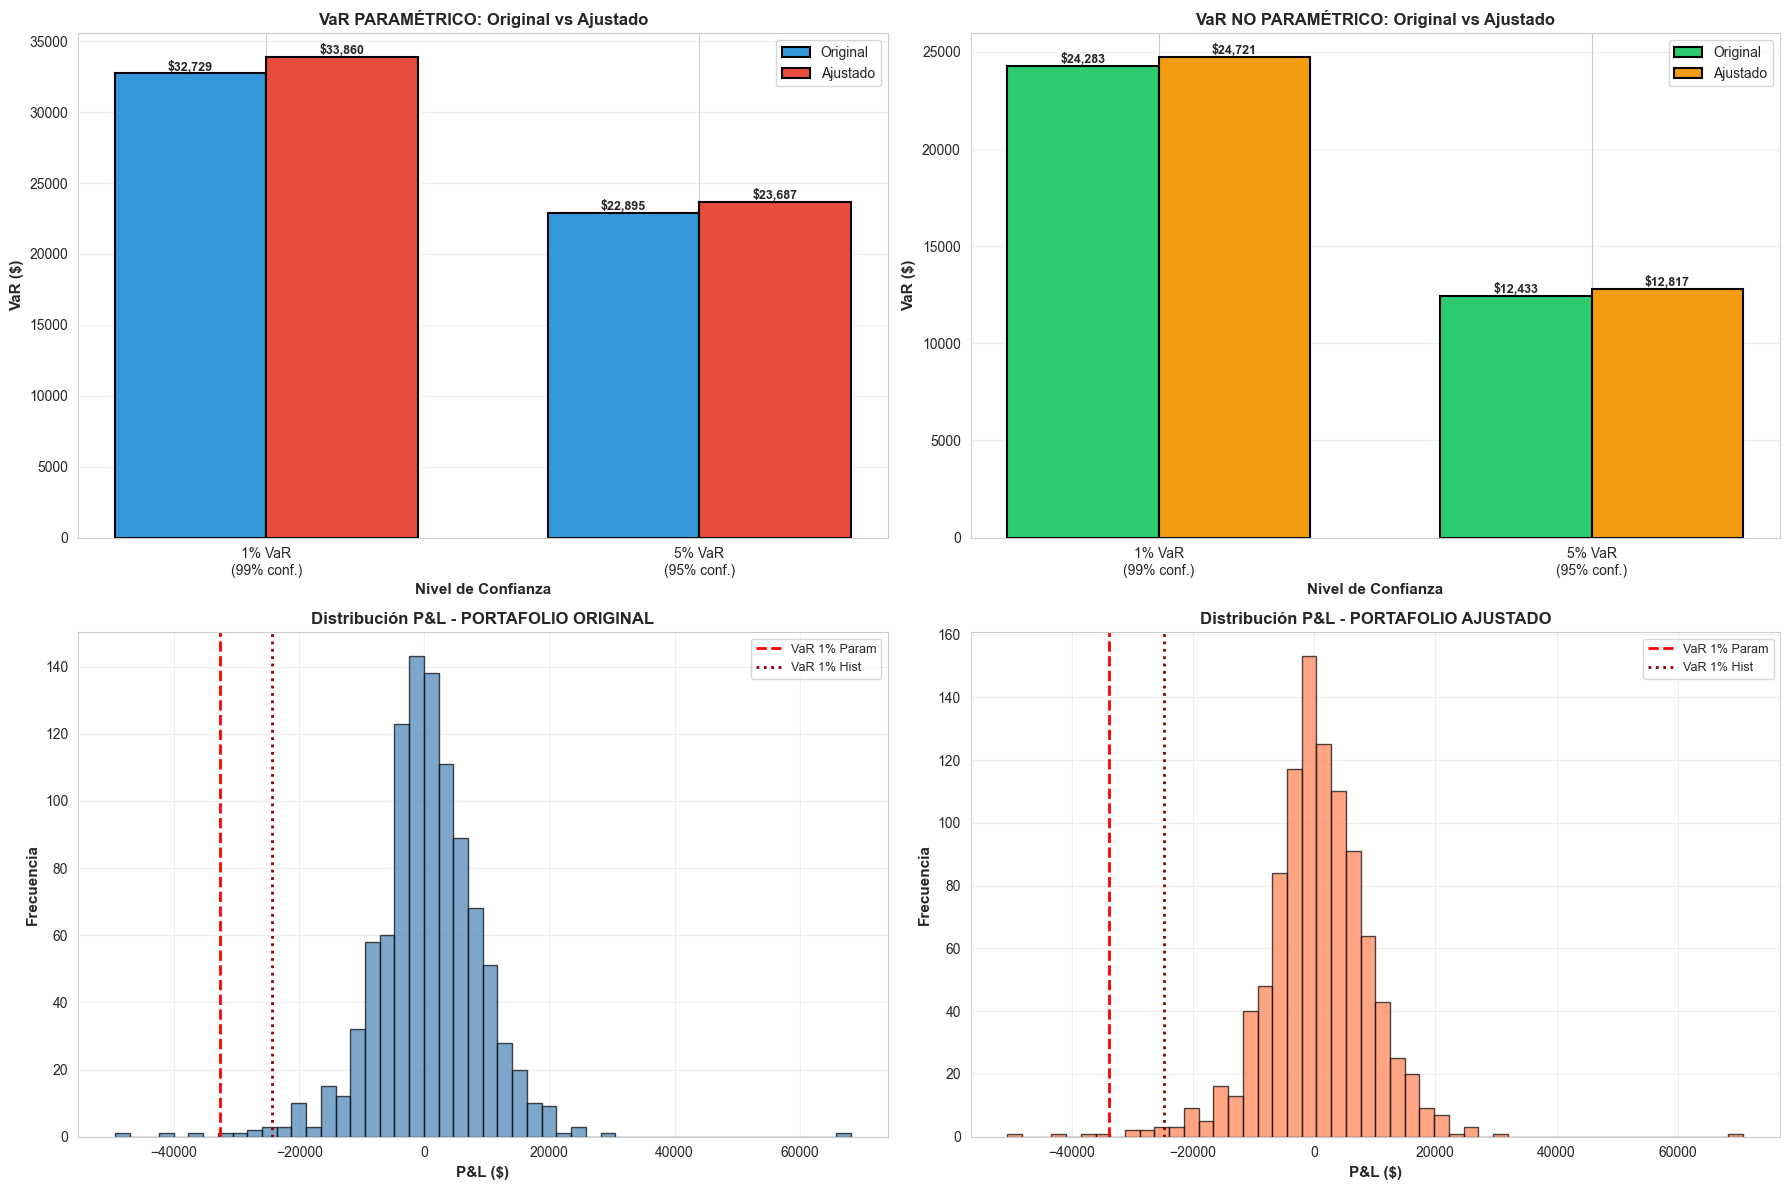


📊 Gráficos comparativos generados exitosamente
   • Arriba: Comparación de VaR Paramétrico y No Paramétrico
   • Abajo: Distribuciones de P&L (Original vs Ajustado)


: 

In [ ]:
# ============================================================================
# VISUALIZACIÓN: COMPARACIÓN GRÁFICA ORIGINAL VS AJUSTADO
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# ===== GRÁFICO 1: Comparación VaR Paramétrico =====
ax1 = axes[0, 0]
categorias = ['1% VaR\n(99% conf.)', '5% VaR\n(95% conf.)']
original_param = [abs(VaR_parametrico_1pct), abs(VaR_parametrico_5pct)]
ajustado_param = [abs(VaR_parametrico_ajustado_1pct), abs(VaR_parametrico_ajustado_5pct)]

x = np.arange(len(categorias))
width = 0.35

bars1 = ax1.bar(x - width/2, original_param, width, label='Original', 
                color='#3498db', edgecolor='black', linewidth=1.5)
bars2 = ax1.bar(x + width/2, ajustado_param, width, label='Ajustado', 
                color='#e74c3c', edgecolor='black', linewidth=1.5)

ax1.set_xlabel('Nivel de Confianza', fontsize=11, fontweight='bold')
ax1.set_ylabel('VaR ($)', fontsize=11, fontweight='bold')
ax1.set_title('VaR PARAMÉTRICO: Original vs Ajustado', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categorias)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# ===== GRÁFICO 2: Comparación VaR No Paramétrico =====
ax2 = axes[0, 1]
original_noparam = [abs(VaR_no_parametrico_1pct), abs(VaR_no_parametrico_5pct)]
ajustado_noparam = [abs(VaR_no_parametrico_ajustado_1pct), abs(VaR_no_parametrico_ajustado_5pct)]

bars3 = ax2.bar(x - width/2, original_noparam, width, label='Original', 
                color='#2ecc71', edgecolor='black', linewidth=1.5)
bars4 = ax2.bar(x + width/2, ajustado_noparam, width, label='Ajustado', 
                color='#f39c12', edgecolor='black', linewidth=1.5)

ax2.set_xlabel('Nivel de Confianza', fontsize=11, fontweight='bold')
ax2.set_ylabel('VaR ($)', fontsize=11, fontweight='bold')
ax2.set_title('VaR NO PARAMÉTRICO: Original vs Ajustado', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(categorias)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

for bar in bars3:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars4:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# ===== GRÁFICO 3: Distribución P&L Original =====
ax3 = axes[1, 0]
ax3.hist(df['P&L'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax3.axvline(VaR_parametrico_1pct, color='red', linestyle='--', linewidth=2, label='VaR 1% Param')
ax3.axvline(VaR_no_parametrico_1pct, color='darkred', linestyle=':', linewidth=2, label='VaR 1% Hist')
ax3.set_xlabel('P&L ($)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
ax3.set_title('Distribución P&L - PORTAFOLIO ORIGINAL', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# ===== GRÁFICO 4: Distribución P&L Ajustado =====
ax4 = axes[1, 1]
ax4.hist(df['P&L_ajustado'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='coral')
ax4.axvline(VaR_parametrico_ajustado_1pct, color='red', linestyle='--', linewidth=2, label='VaR 1% Param')
ax4.axvline(VaR_no_parametrico_ajustado_1pct, color='darkred', linestyle=':', linewidth=2, label='VaR 1% Hist')
ax4.set_xlabel('P&L ($)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
ax4.set_title('Distribución P&L - PORTAFOLIO AJUSTADO', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Gráficos comparativos generados exitosamente")
print("   • Arriba: Comparación de VaR Paramétrico y No Paramétrico")
print("   • Abajo: Distribuciones de P&L (Original vs Ajustado)")